<a href="https://colab.research.google.com/github/rocioxoviedo/DiploDatos-FCE-FAMAF-2025/blob/main/Grupo_20_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso de uso: Predecir la propensión de los usuarios a comprar boletos en el proximo mes**

**Objetivo:** armar un modelo de clasificación para predecir si un usuario comprará o no un boleto

In [ ]:
# Importación de módulos y librerías a utilizar
import numpy as np,random
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# fijamos semilla global
np.random.seed(42)
random.seed(42)


In [ ]:
# Importación del set de datos a trabajar
url='https://drive.google.com/file/d/1ZdGW0m3P9BSXj5MhtjbuhbWw35jmBm97/view?usp=drive_link'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
print(dwn_url)
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df

https://drive.google.com/uc?export=download&id=1ZdGW0m3P9BSXj5MhtjbuhbWw35jmBm97


,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [ ]:
# Cantidad de registros y columnas del dataframe
df.shape

(11760, 17)

In [ ]:
# Resumen con información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

**Se puede observar la presencia de valores nulos en varias columnas del dataframe**

**Valores de cada columna**

In [ ]:
df["Taken_product"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df["preferred_device"].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

In [ ]:
df["yearly_avg_Outstation_checkins"].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [ ]:
# Fila donde yearly_avg_Outstation_checkins = *
df[df['yearly_avg_Outstation_checkins']=="*"]

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
1618,1001619,No,307.0,iOS and Android,32655.0,*,4,Financial,94.0,2238,2,No,21,Yes,4,1.0,7.0


In [ ]:
df["member_in_family"].unique()

array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object)

In [ ]:
df["preferred_location_type"].unique()

array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
       'Beach', 'Historical site', 'Big Cities', 'Trekking',
       'Hill Stations'], dtype=object)

In [ ]:
df["following_company_page"].unique()

array(['Yes', 'No', 'Yeso', nan, '1', '0'], dtype=object)

In [ ]:
df["working_flag"].unique()

array(['No', 'Yes', '0'], dtype=object)

In [ ]:
df["Adult_flag"].unique()

array([ 0.,  1.,  3.,  2., nan])

**Transformaciones sobre columnas**

**UserID:** Se realizó una conversión a tipo de dato "object" para mejorar el análisis.


In [ ]:
df["UserID"] = df["UserID"].astype("object")

**Preferred_device**\
Problema detectado: Se nombra de diferente manera a la misma categoría. Se decide agrupar todos los dispositivos móviles bajo la categoría "Mobile" ya que la categoría "ios and android" es la más amplia y no podemos diferenciar el sistema operativo de cada usuario.

In [ ]:

df['preferred_device'] = df['preferred_device'].str.strip().str.lower()


In [ ]:
df['preferred_device'] = df['preferred_device'].replace({
    'android os': 'mobile',
     'others': 'other',
    'ios': 'mobile',
    'ios and android': 'mobile',
    'android': 'mobile',

})

In [ ]:
df['preferred_device'] = df['preferred_device'].str.capitalize()

In [ ]:
df['preferred_device'].unique()

array(['Mobile', nan, 'Other', 'Tab', 'Laptop'], dtype=object)

**Yearly_avg_outstation_checkins**\
**Problema detectado:**
Error tipográfico: Una de las filas tiene como dato un "*". Se procede a reemplazarlo por un valor nulo y transformar la columna a tipo de dato "Int64" para poder hacer un análisis numérico sobre la misma.


In [ ]:
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*', np.nan)

In [ ]:
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype("Int64")

In [ ]:
df['yearly_avg_Outstation_checkins'].unique()

<IntegerArray>
[   1,   24,   23,   27,   16,   15,   26,   19,   21,   11,   10,   25,   12,
   18,   29, <NA>,   22,   14,   20,   28,   17,   13,    5,    8,    2,    3,
    9,    7,    6,    4]
Length: 30, dtype: Int64

**Member_in_family**\
**Problema detectado:**
Error tipográfico: "Three" debería ser 3.

In [ ]:
df["member_in_family"].unique()

array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object)

In [ ]:
df["member_in_family"]= df["member_in_family"].replace("Three",3)

In [ ]:
df["member_in_family"].unique()

array(['2', '1', '4', 3, '3', '5', '10'], dtype=object)

Los transformamos en tipo de datos "int64" para poder hacer análisis numéricos de esta columna.  

In [ ]:
df['member_in_family'] = df['member_in_family'].astype('int64')

In [ ]:
df["member_in_family"].unique()

array([ 2,  1,  4,  3,  5, 10])

**Following_company_page**\
**Problema detectado:**\
Error tipográfico: "Yeso" debería ser "Yes".\
Valores "1" y "0" no son consistentes con el formato esperado (Yes/No). Como por regla general se utiliza el 0 para referirse a "No" y el 1 para referirse a
"Yes", procedemos a remplazar esos valores.

In [ ]:
df["following_company_page"].unique()

array(['Yes', 'No', 'Yeso', nan, '1', '0'], dtype=object)

In [ ]:
df['following_company_page'] = df['following_company_page'].replace({
    'Yeso': 'Yes',
    '1': 'Yes',
    '0': 'No'
})

In [ ]:
df["following_company_page"].unique()

array(['Yes', 'No', nan], dtype=object)

Valores únicos después de la limpieza: ['Yes', 'No', NaN]

**working_flag**\
**Problema detectado:**\
Valor "0" no es consistente con el formato esperado (Yes/No). Se procede a reemplazarlo por "No".

In [ ]:
df["working_flag"].unique()

array(['No', 'Yes', '0'], dtype=object)

In [ ]:
df["working_flag"] = df["working_flag"].replace("0","No")

In [ ]:
df["working_flag"].unique()

array(['No', 'Yes'], dtype=object)

Valores únicos después de la limpieza: ['Yes', 'No']

**Adult Flag:** Lo transformamos en tipo de datos "int64" para poder hacer análisis numéricos de esta columna.  

In [ ]:
df['Adult_flag'] = df['Adult_flag'].astype('Int64')

In [ ]:
# Resumen del dataframe luego de las transformaciones realizadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  object 
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11684 non-null  Int64  
 6   member_in_family                              11760 non-null  int64  
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
# Generamos estadísticas descriptivas de las columnas numéricas del dataframe
df.describe().round(2)

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,11179.00,11379.00,11684.0,11760.00,11554.00,11760.00,11760.00,11760.00,11760.00,11759.0,11759.00
mean,280.83,28170.48,8.22,2.92,74.79,6531.70,3.20,28.66,2.71,0.79,13.82
std,68.18,14385.03,8.67,1.04,24.03,4706.61,2.62,48.66,1.08,0.85,9.07
min,35.00,3570.00,1.0,1.00,3.00,1009.00,0.00,4.00,1.00,0.0,0.00
25%,232.00,16380.00,1.0,2.00,57.00,2940.75,1.00,17.00,2.00,0.0,8.00
50%,271.00,28076.00,4.0,3.00,75.00,4948.00,3.00,22.00,3.00,1.0,12.00
75%,324.00,40525.00,14.0,4.00,92.00,8393.25,5.00,27.00,4.00,1.0,18.00
max,464.00,252430.00,29.0,10.00,815.00,20065.00,11.00,500.00,10.00,3.0,270.00


**Identificación de valores outliers mediante gráficos de BoxPlot**

<Axes: >

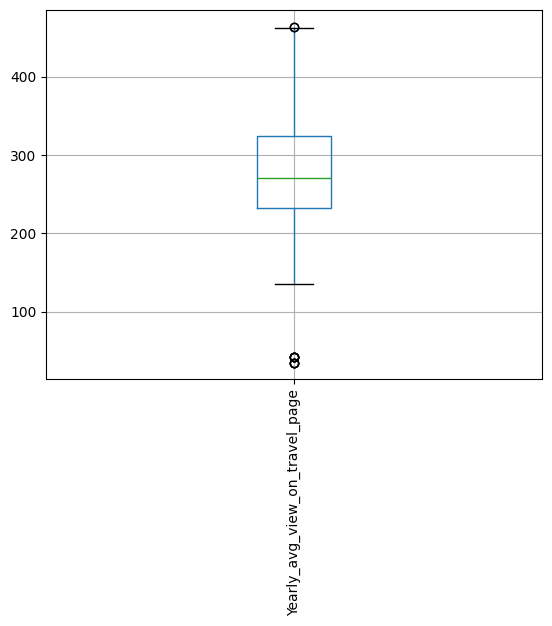

In [ ]:
df.boxplot('Yearly_avg_view_on_travel_page',rot=90)

<Axes: >

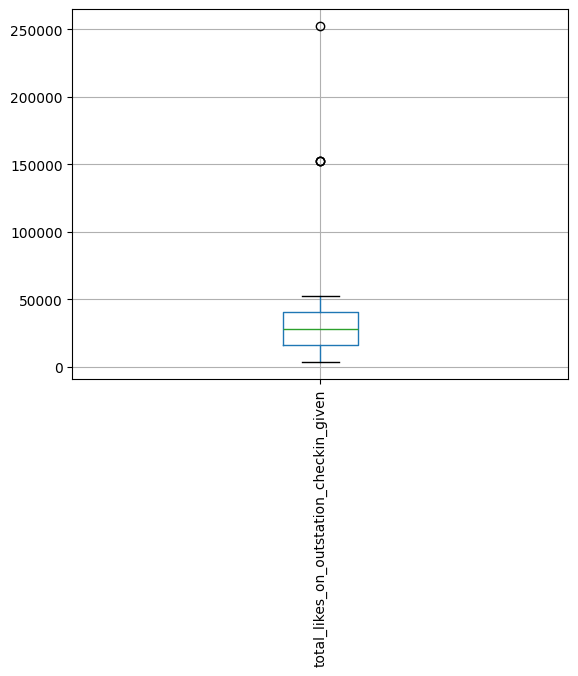

In [ ]:
df.boxplot('total_likes_on_outstation_checkin_given',rot=90)

<Axes: >

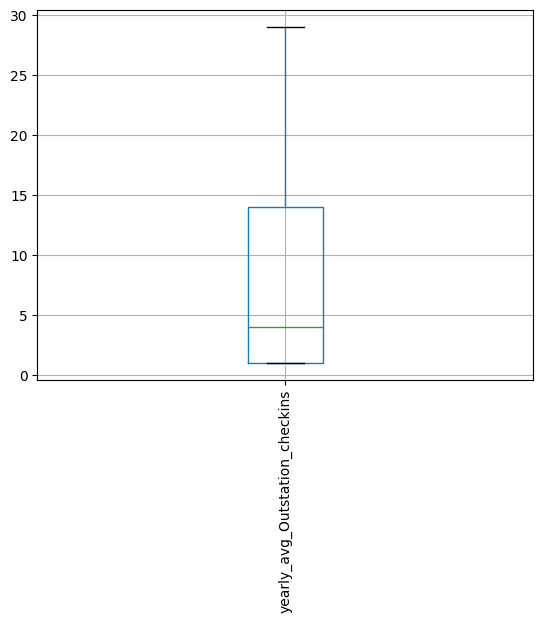

In [ ]:
df.boxplot('yearly_avg_Outstation_checkins',rot=90)

<Axes: >

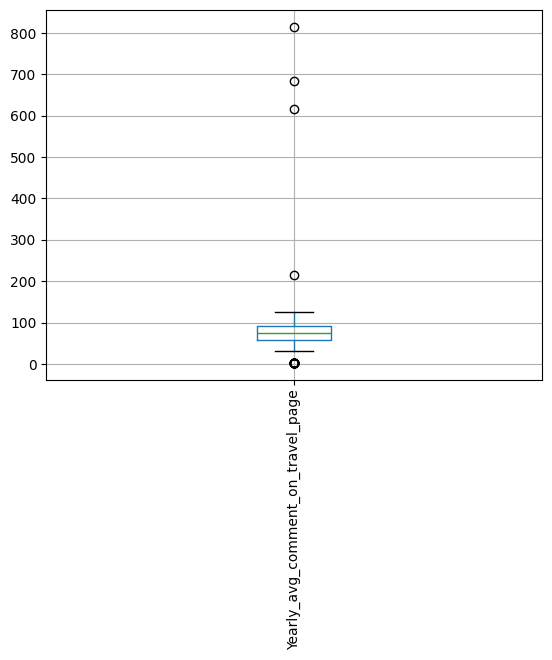

In [ ]:
df.boxplot('Yearly_avg_comment_on_travel_page',rot=90)

<Axes: >

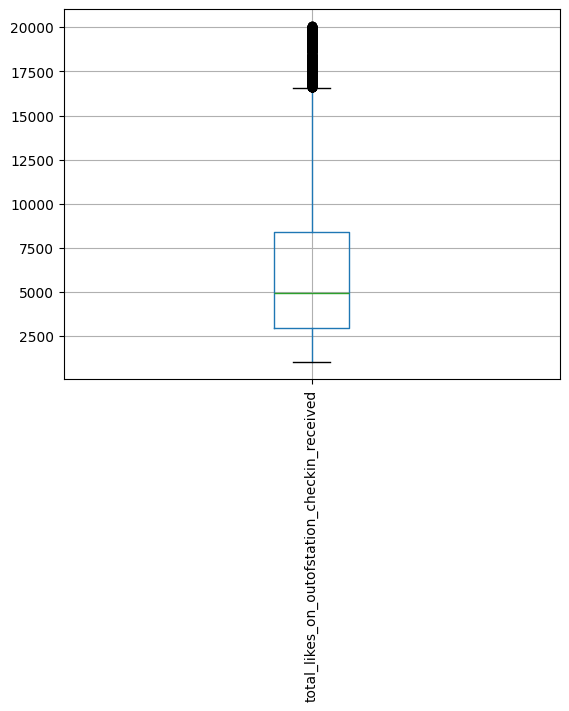

In [ ]:
df.boxplot('total_likes_on_outofstation_checkin_received',rot=90)

<Axes: >

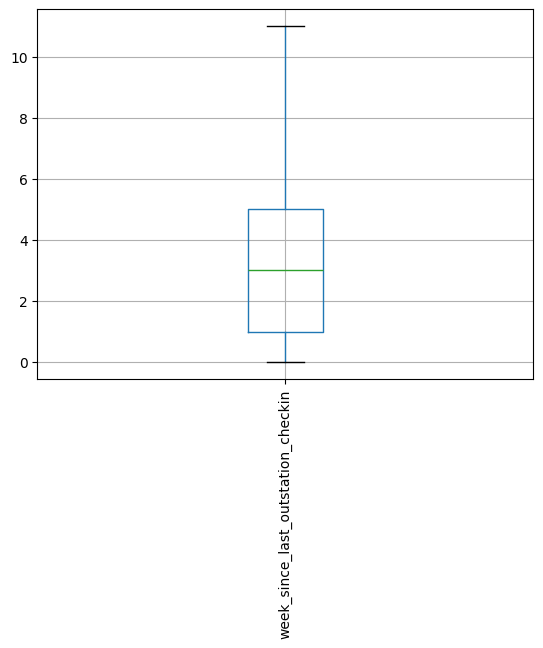

In [ ]:
df.boxplot('week_since_last_outstation_checkin',rot=90)

<Axes: >

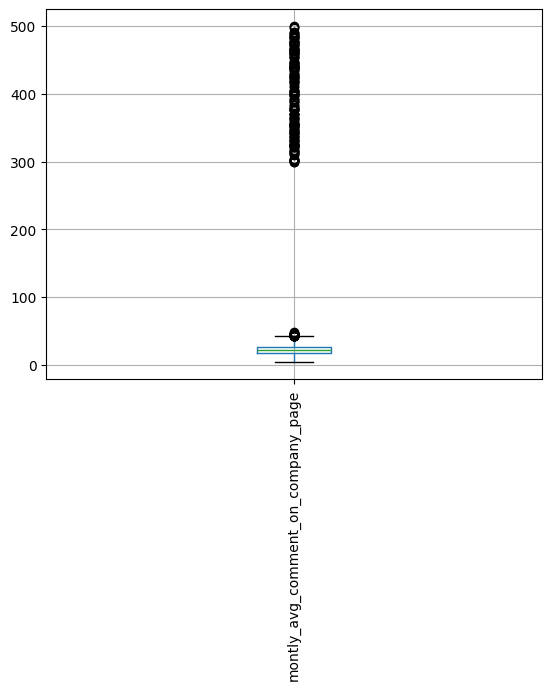

In [ ]:
df.boxplot('montly_avg_comment_on_company_page',rot=90)

<Axes: >

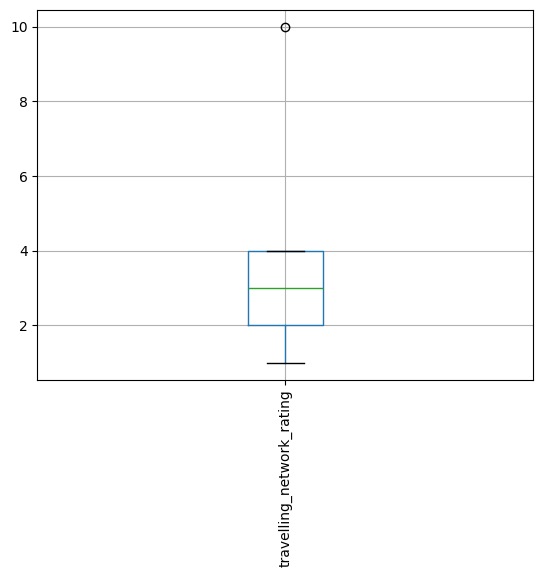

In [ ]:
df.boxplot('travelling_network_rating',rot=90)

<Axes: >

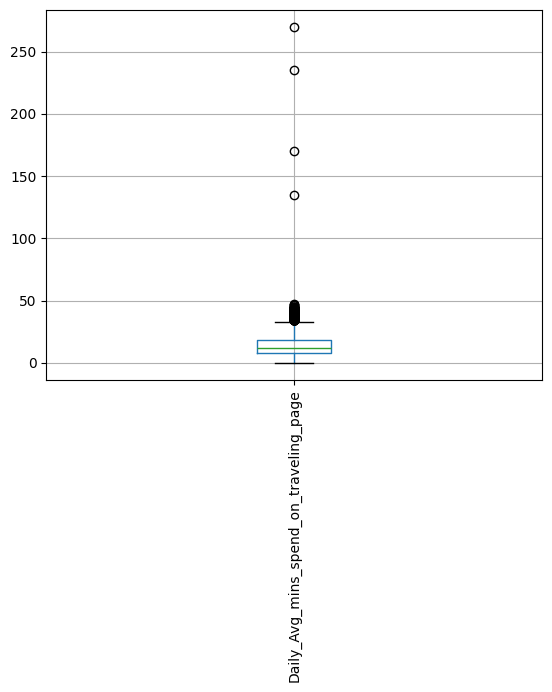

In [ ]:
df.boxplot('Daily_Avg_mins_spend_on_traveling_page',rot=90)

**Tratamiento Outliers**\
Decidimos trabajar con los percentiles 5% y 95% para hacerlo más exigente. De este modo, eliminamos aquellos valores que superen el percentil 95% más 1.5 veces el rango intercuartílico. No decidimos trabjar con un limite inferior para eliminar outliers ya que valores por debajo de ese límite consideramos que es normal que puedan darse.

Con respecto a la columna **"montly_avg_comment_on_company_page"**, si bien presenta valores outliers, consideramos que son valores factibles de darse.

In [ ]:
cols_outliers = ["Yearly_avg_view_on_travel_page", "total_likes_on_outstation_checkin_given", "Yearly_avg_comment_on_travel_page", "total_likes_on_outofstation_checkin_received", "Daily_Avg_mins_spend_on_traveling_page"]

for col in cols_outliers:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1

    limite_superior = Q3 + 1.5 * IQR

    df = df[(df[col] <= limite_superior) | (df[col].isna())]

Volvemos a hacer los gráficos de BoxPlot para ver como quedó la distribución de valores

<Axes: >

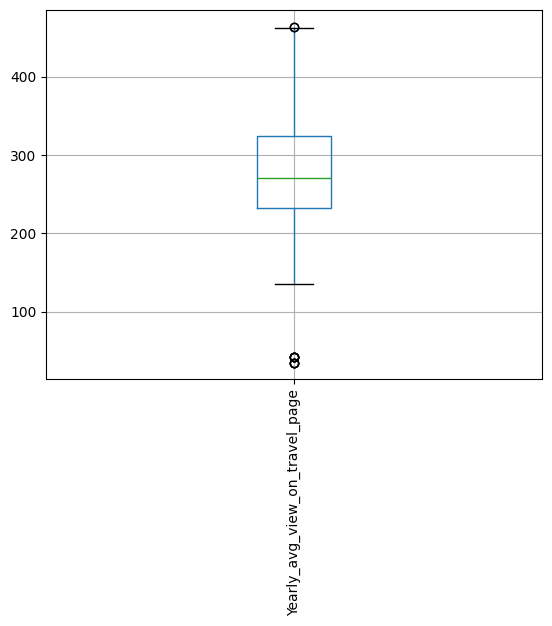

In [ ]:
df.boxplot('Yearly_avg_view_on_travel_page',rot=90)

<Axes: >

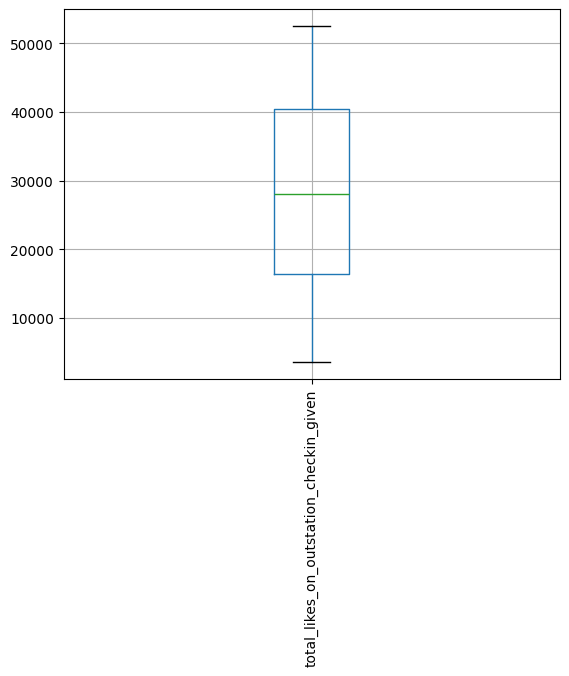

In [ ]:
df.boxplot('total_likes_on_outstation_checkin_given',rot=90)

<Axes: >

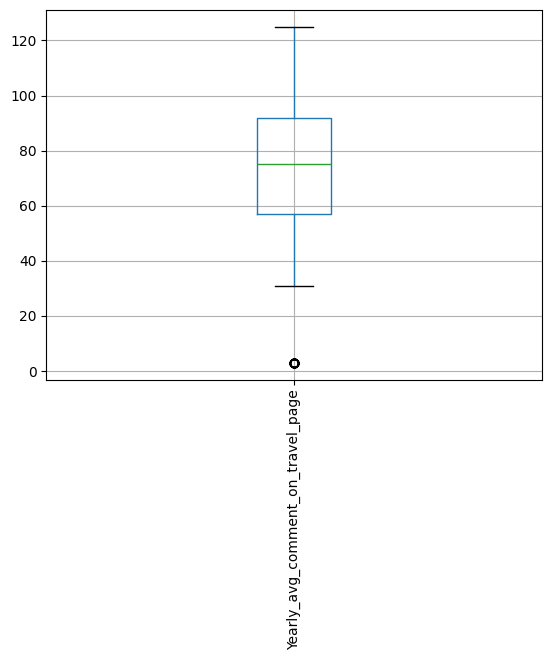

In [ ]:
df.boxplot('Yearly_avg_comment_on_travel_page',rot=90)

<Axes: >

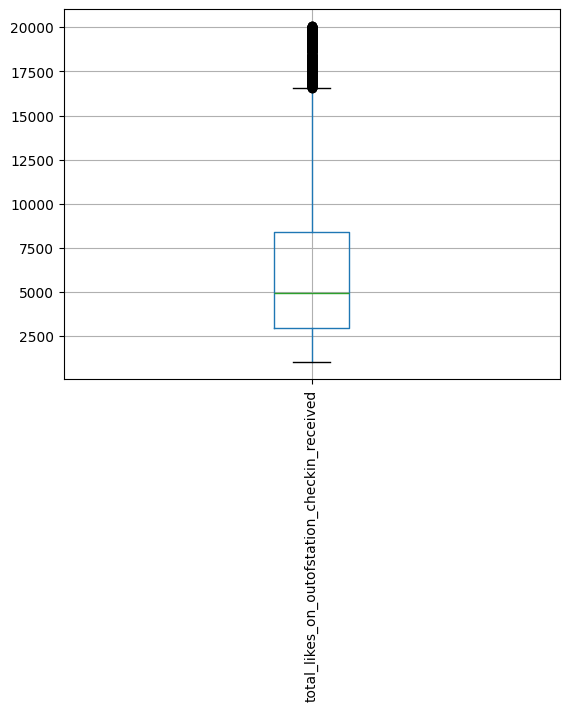

In [ ]:
df.boxplot('total_likes_on_outofstation_checkin_received',rot=90)

<Axes: >

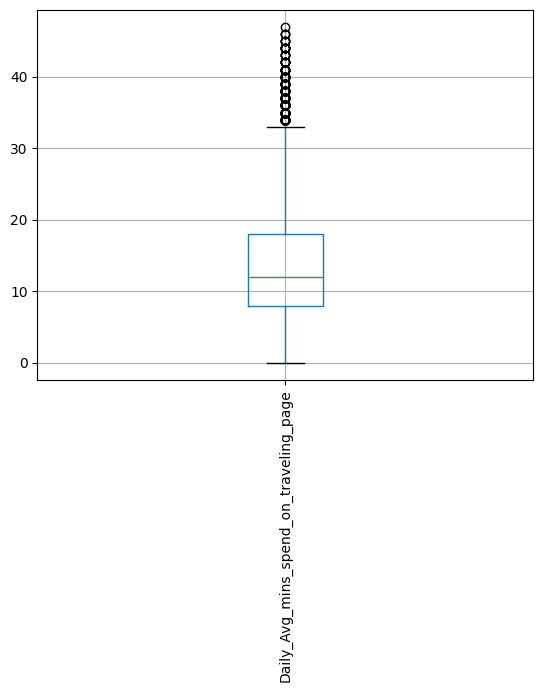

In [ ]:
df.boxplot('Daily_Avg_mins_spend_on_traveling_page',rot=90)

**Cantidad de valores nulos por columna**

In [ ]:
nulos = df["Yearly_avg_view_on_travel_page"].isnull().sum()
porcentaje_nulos = (nulos/11760)*100
print("El porcentaje de valores nulos es:",round(porcentaje_nulos,2),"%")


El porcentaje de valores nulos es: 4.92 %


In [ ]:
nulos = df["preferred_device"].isnull().sum()
porcentaje_nulos = (nulos/11760)*100
print("El porcentaje de valores nulos es:",round(porcentaje_nulos,2),"%")

El porcentaje de valores nulos es: 0.45 %


In [ ]:
nulos = df["total_likes_on_outstation_checkin_given"].isnull().sum()
porcentaje_nulos = (nulos/11760)*100
print("El porcentaje de valores nulos es:",round(porcentaje_nulos,2),"%")

El porcentaje de valores nulos es: 3.24 %


In [ ]:
nulos = df["yearly_avg_Outstation_checkins"].isnull().sum()
porcentaje_nulos = (nulos/11760)*100
print("El porcentaje de valores nulos es:",round(porcentaje_nulos,2),"%")

El porcentaje de valores nulos es: 0.65 %


In [ ]:
nulos = df["preferred_location_type"].isnull().sum()
porcentaje_nulos = (nulos/11760)*100
print("El porcentaje de valores nulos es:",round(porcentaje_nulos,2),"%")

El porcentaje de valores nulos es: 0.26 %


In [ ]:
nulos = df["Yearly_avg_comment_on_travel_page"].isnull().sum()
porcentaje_nulos = (nulos/11760)*100
print("El porcentaje de valores nulos es:",round(porcentaje_nulos,2),"%")

El porcentaje de valores nulos es: 1.73 %


In [ ]:
nulos = df["following_company_page"].isnull().sum()
porcentaje_nulos = (nulos/11760)*100
print("El porcentaje de valores nulos es:",round(porcentaje_nulos,2),"%")

El porcentaje de valores nulos es: 0.88 %


In [ ]:
nulos = df["Adult_flag"].isnull().sum()
porcentaje_nulos = (nulos/11760)*100
print("El porcentaje de valores nulos es:",round(porcentaje_nulos,2),"%")

El porcentaje de valores nulos es: 0.01 %


In [ ]:
nulos = df["Daily_Avg_mins_spend_on_traveling_page"].isnull().sum()
porcentaje_nulos = (nulos/11760)*100
print("El porcentaje de valores nulos es:",round(porcentaje_nulos,2),"%")

El porcentaje de valores nulos es: 0.01 %


**Tratamiento valores nulos**

**"Yearly_avg_view_on_travel_page"**. Decidimos imputar la media teniendo en cuenta que tiene una distribución similar a una normal.

In [ ]:
mean_yearly_views = df['Yearly_avg_view_on_travel_page'].mean()
df.loc[:, 'Yearly_avg_view_on_travel_page'] = df['Yearly_avg_view_on_travel_page'].fillna(int(mean_yearly_views)) # Imputar la media (convertida a entero) a la columna "Yearly_avg_view_on_travel_page"

# Verificar si quedan valores nulos en la columna
print("Cantidad de valores nulos en 'Yearly_avg_view_on_travel_page' después de imputar la media:", df['Yearly_avg_view_on_travel_page'].isnull().sum())

Cantidad de valores nulos en 'Yearly_avg_view_on_travel_page' después de imputar la media: 0


**total_likes_on_outstation_checkin_given.** Imputamos la mediana a los valores nulos ya que no presenta una distribución normal.

In [ ]:
median_likes = df['total_likes_on_outstation_checkin_given'].median()
df.loc[:,"total_likes_on_outstation_checkin_given"] = df['total_likes_on_outstation_checkin_given'].fillna(median_likes)

print("Cantidad de valores nulos en 'total_likes_on_outstation_checkin_given' después de imputar la mediana:", df['total_likes_on_outstation_checkin_given'].isnull().sum())

Cantidad de valores nulos en 'total_likes_on_outstation_checkin_given' después de imputar la mediana: 0


**Yearly_avg_comment_on_travel_page.** Vamos a imputar la mediana

In [ ]:
median_likes = df["Yearly_avg_comment_on_travel_page"].median()
df.loc[:,"Yearly_avg_comment_on_travel_page"] = (
    df["Yearly_avg_comment_on_travel_page"].fillna(median_likes)
)

print(
    "Cantidad de valores nulos después de imputar:",
    df["Yearly_avg_comment_on_travel_page"].isnull().sum()
)

Cantidad de valores nulos después de imputar: 0


**yearly_avg_outstation_checkins**. Imputamos la mediana

In [ ]:
median_likes = df["yearly_avg_Outstation_checkins"].median()
df.loc[:,"yearly_avg_Outstation_checkins"] = df["yearly_avg_Outstation_checkins"].fillna(median_likes)

print("Cantidad de valores nulos en yearly_avg_Outstation_checkins después de imputar la mediana:", df["yearly_avg_Outstation_checkins"].isnull().sum())

Cantidad de valores nulos en yearly_avg_Outstation_checkins después de imputar la mediana: 0


**Daily_Avg_mins_spend_on_traveling_page**. Imputamos la mediana a los valores nulos

In [ ]:
median_likes = df["Daily_Avg_mins_spend_on_traveling_page"].median()
df.loc[:,"Daily_Avg_mins_spend_on_traveling_page"] = df["Daily_Avg_mins_spend_on_traveling_page"].fillna(median_likes)

print("Cantidad de valores nulos en Daily_Avg_mins_spend_on_traveling_page después de imputar la mediana:", df["Daily_Avg_mins_spend_on_traveling_page"].isnull().sum())

Cantidad de valores nulos en Daily_Avg_mins_spend_on_traveling_page después de imputar la mediana: 0


**Tomamos la decision de eliminar los valores nulos teniendo en cuenta que la cantidad de los mismos no es elevada**

In [ ]:
columns_to_drop_na = [
    "preferred_device",
    "preferred_location_type",
    "following_company_page",
    "Adult_flag"
]

df = df.dropna(subset=columns_to_drop_na)

print("Dimensiones del DataFrame después de eliminar nulos:", df.shape)

Dimensiones del DataFrame después de eliminar nulos: (11560, 17)


**Dataset final limpio**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11560 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11560 non-null  object 
 1   Taken_product                                 11560 non-null  object 
 2   Yearly_avg_view_on_travel_page                11560 non-null  float64
 3   preferred_device                              11560 non-null  object 
 4   total_likes_on_outstation_checkin_given       11560 non-null  float64
 5   yearly_avg_Outstation_checkins                11560 non-null  Int64  
 6   member_in_family                              11560 non-null  int64  
 7   preferred_location_type                       11560 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11560 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11560 non-null  int6

**Análisis gráfico de la distribución de variables**

In [ ]:
from scipy.stats import f_oneway

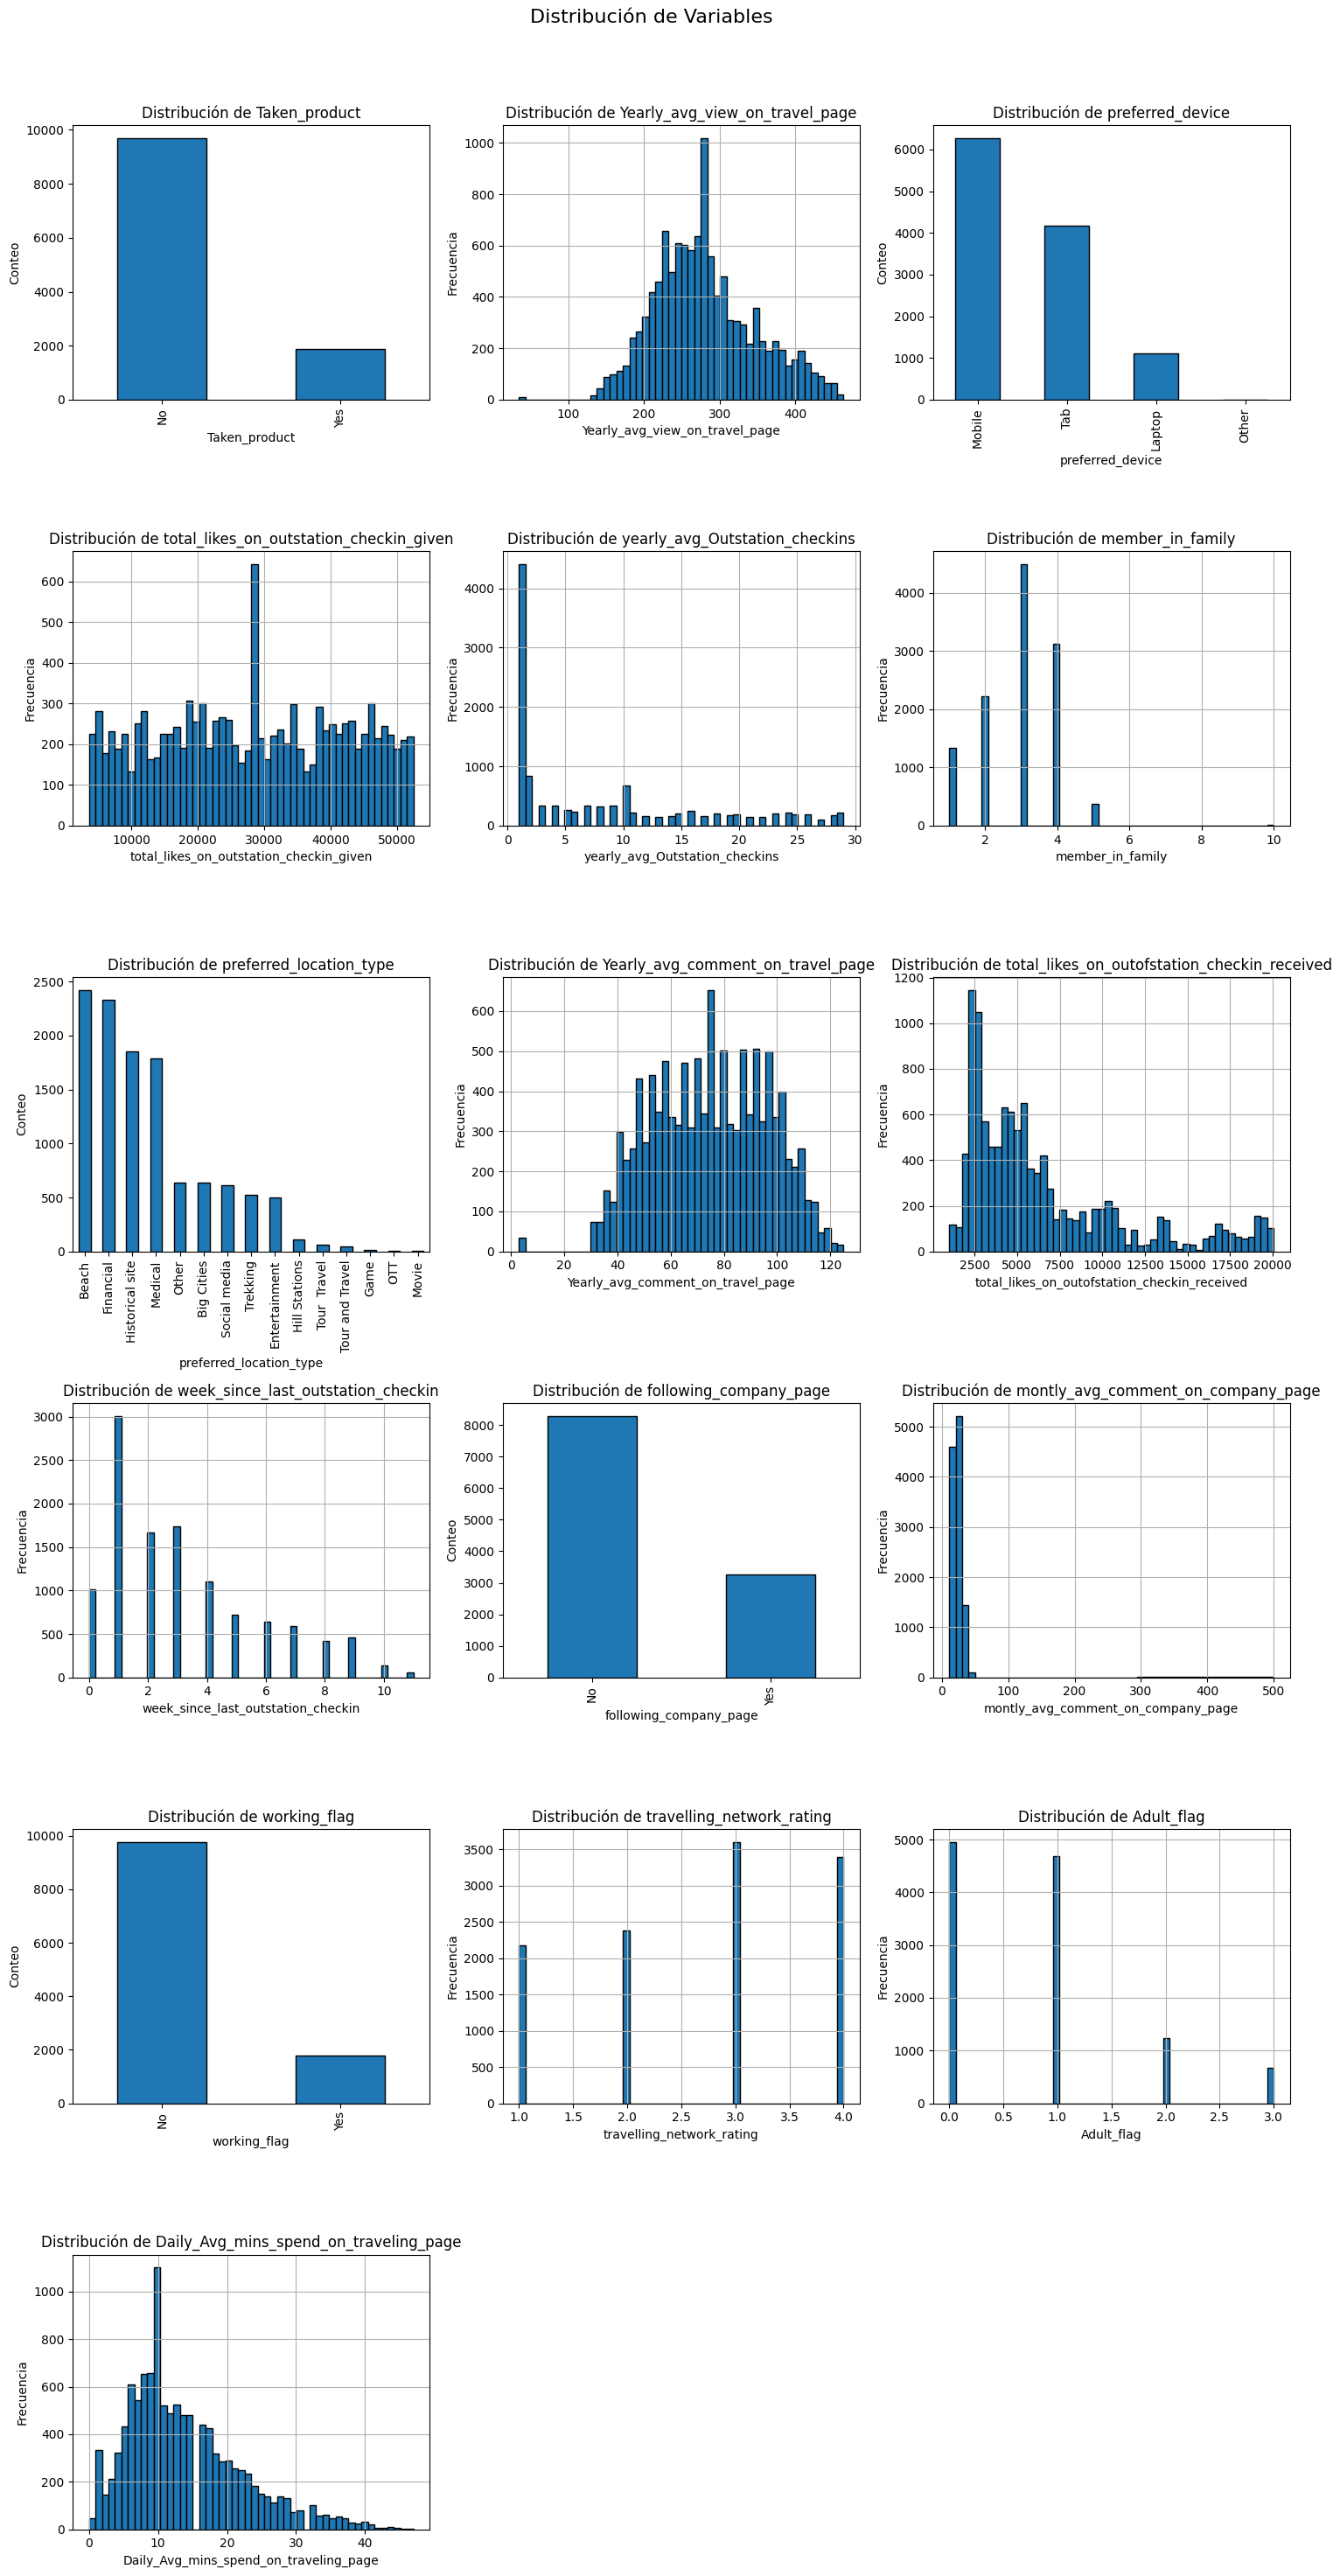

In [ ]:
columnas = df.columns.drop('UserID')

n = len(columnas)
nrows = int(np.ceil(n / 3))
ncols = min(n, 3)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
fig.suptitle('Distribución de Variables', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(columnas):
    ax = axes[i]

    if pd.api.types.is_numeric_dtype(df[col]):

        df[col].hist(ax=ax, bins=50, edgecolor='black')
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia')
    else:

        df[col].value_counts().plot(kind='bar', ax=ax, edgecolor='black')
        ax.set_xlabel(col)
        ax.set_ylabel('Conteo')

    ax.set_title(f'Distribución de {col}')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**En base al análisis gráfico, se puede afirmar:**\
**Taken_product:** la cantidad de personas que no adquirieron el producto es casi 5 veces más grande que las que si lo adquirieron.\
**Yearly_avg_view_on_travel_page:** Las vistas promedio anuales de la página de viajes presentan una distribución bastante simétrica y cercana a la normal, con valores concentrados entre 200 y 350. Esto indica un patrón de navegación regular y consistente.\
**Preferred_device:** las tablets y los dispositivos móviles concentran la mayoría de usuarios. Laptop es claramente minoritaria y “Other” casi residual.\
**Total_likes_on_outstation_checkin_given:** distribución bastante plana/heterogénea (no claramente sesgada) con un pico visible alrededor de los 30 mil. Gran dispersión general.\
**Yearly_avg_outstation_checkins:** concentración masiva en 0–2 check-ins anuales, lo que evidencia baja participación en esta funcionalidad. Muy pocos usuarios realizan check-ins frecuentes. \
**Member_in_family:** predominan familias pequeñas (1-4 miembros) y la distribución cae para familias con 5 miembros o más.\
**Preferred_location_type:** varias categorías con peso alto (Beach, Financial, Historical Site y Medical) concentran gran parte de las preferencias, el resto aparece con frecuencias menores y dispersas.\
**Yearly_avg_comment_on_travel_page:** Los comentarios anuales en la página de viajes se concentran principalmente entre 50 y 95, mostrando una participación moderada en las interacciones de este tipo. Es un posible indicador de interacción baja con la plataforma.\
**Total_likes_on_outstation_checkin_received:** presenta un sesgo fuerte a la derecha. Alta variabilidad.\
**Week_since_last_outstation_checkin:** mayor frecuencia en las primeras semanas (0–3) y caída pronunciada a medida que aumenta el tiempo desde el último check-in. Lo que refleja que la mayoría de los usuarios realizó un check-in recientemente.\
**Following_company_page:** la cantidad de usuarios que no siguen la página es más del doble que los usuarios que si la siguen.\
**Montly_avg_comment_on_company_page:** La actividad en comentarios dentro de la página de la empresa es reducida: la gran mayoría de los usuarios se concentra en valores bajos (0–50), con pocos casos de interacción elevada.\
**Working_flag:** la cantidad de "No" es casi 5 veces más grande que la cantidad de respuestas positivas.\
**Travelling_network_rating:** concentrada entre 3 y 4.\
**Adult_flag:** la mayoría de valores son 0 y 1 con muchas diferencia del resto.\
**Daily_avg_mins_spend_on_traveling_page:** El tiempo promedio diario invertido en la página de viajes presenta un sesgo positivo: la mayoría dedica entre 8 y 20 minutos y solo una minoría supera los 30–40 minutos.


/tmp/ipython-input-333285412.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, edgecolor='black', palette='pastel')
/tmp/ipython-input-333285412.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, edgecolor='black', palette='pastel')
/tmp/ipython-input-333285412.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, edgecolor='black', palette='pastel')
/tmp/ipython-input-333285412.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

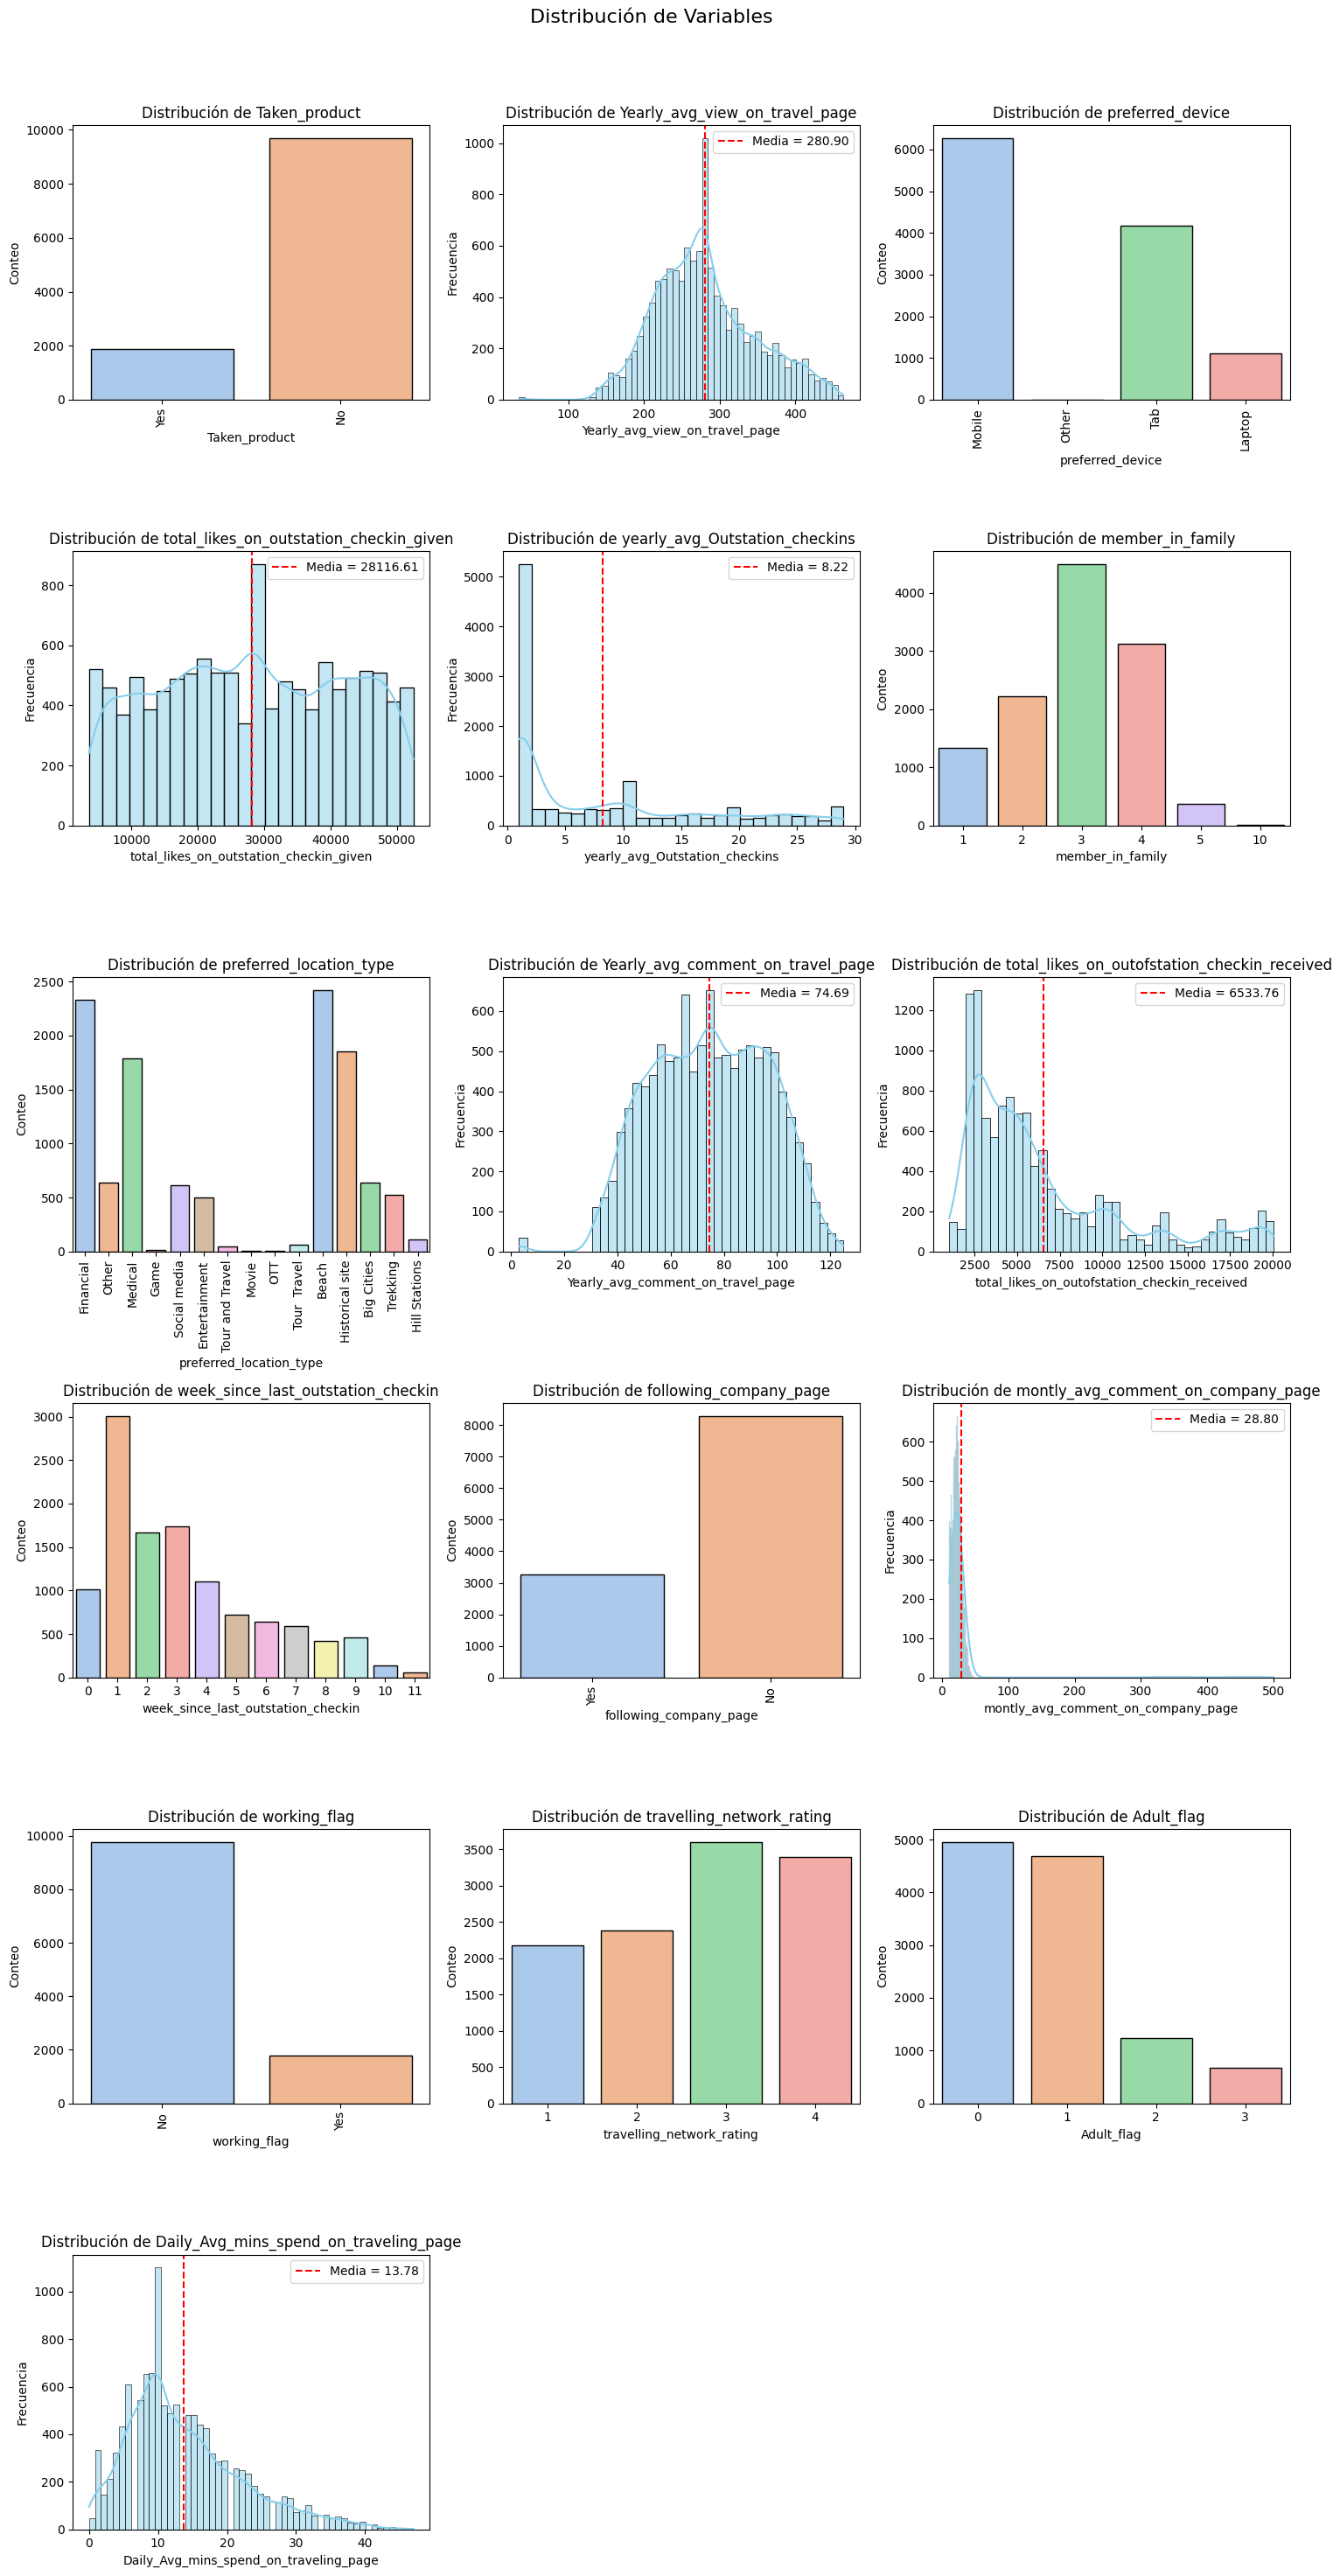

In [ ]:
columnas = df.columns.drop('UserID')

n = len(columnas)
nrows = int(np.ceil(n / 3))
ncols = min(n, 3)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
fig.suptitle('Distribución de Variables', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(columnas):
    ax = axes[i]

    if pd.api.types.is_numeric_dtype(df[col]):
        # Decidir si es discreta o continua
        valores_unicos = df[col].nunique()

        if valores_unicos < 20:
            # Tratar como categórica (countplot)
            sns.countplot(x=df[col], ax=ax, edgecolor='black', palette='pastel')
            ax.set_ylabel('Conteo')

        else:
            # Tratar como continua (histograma + kde + media)
            sns.histplot(df[col], kde=True, ax=ax, edgecolor='black', color='skyblue')
            media = df[col].mean()
            ax.axvline(media, color='r', linestyle='--', label=f'Media = {media:.2f}')
            ax.set_ylabel('Frecuencia')
            ax.legend()
    else:
        # Categórica (countplot)
        sns.countplot(x=df[col], ax=ax, edgecolor='black', palette='pastel')
        ax.set_ylabel('Conteo')
        ax.tick_params(axis='x', rotation=90)

    ax.set_xlabel(col)
    ax.set_title(f'Distribución de {col}')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Para obtener una visión general de la distribución de las variables del dataset, se seleccionaron todas las columnas excepto 'UserID', porque es un identificador único y no aporta información estadística relevante. Además, se crearon sub gráficos organizados en filas y columnas, con un máximo de tres gráficos por fila para facilitar la visualización. Para cada variable numérica se determinó si debía tratarse como una variable discreta o continua en función de la cantidad de valores únicos que posee. En el caso de variables con menos de 20 valores únicos, se las consideró categóricas y se graficaron utilizando diagramas de barras (countplot) para visualizar la frecuencia de cada categoría.

**Histogramas segmentados por la categoría Taken_product**

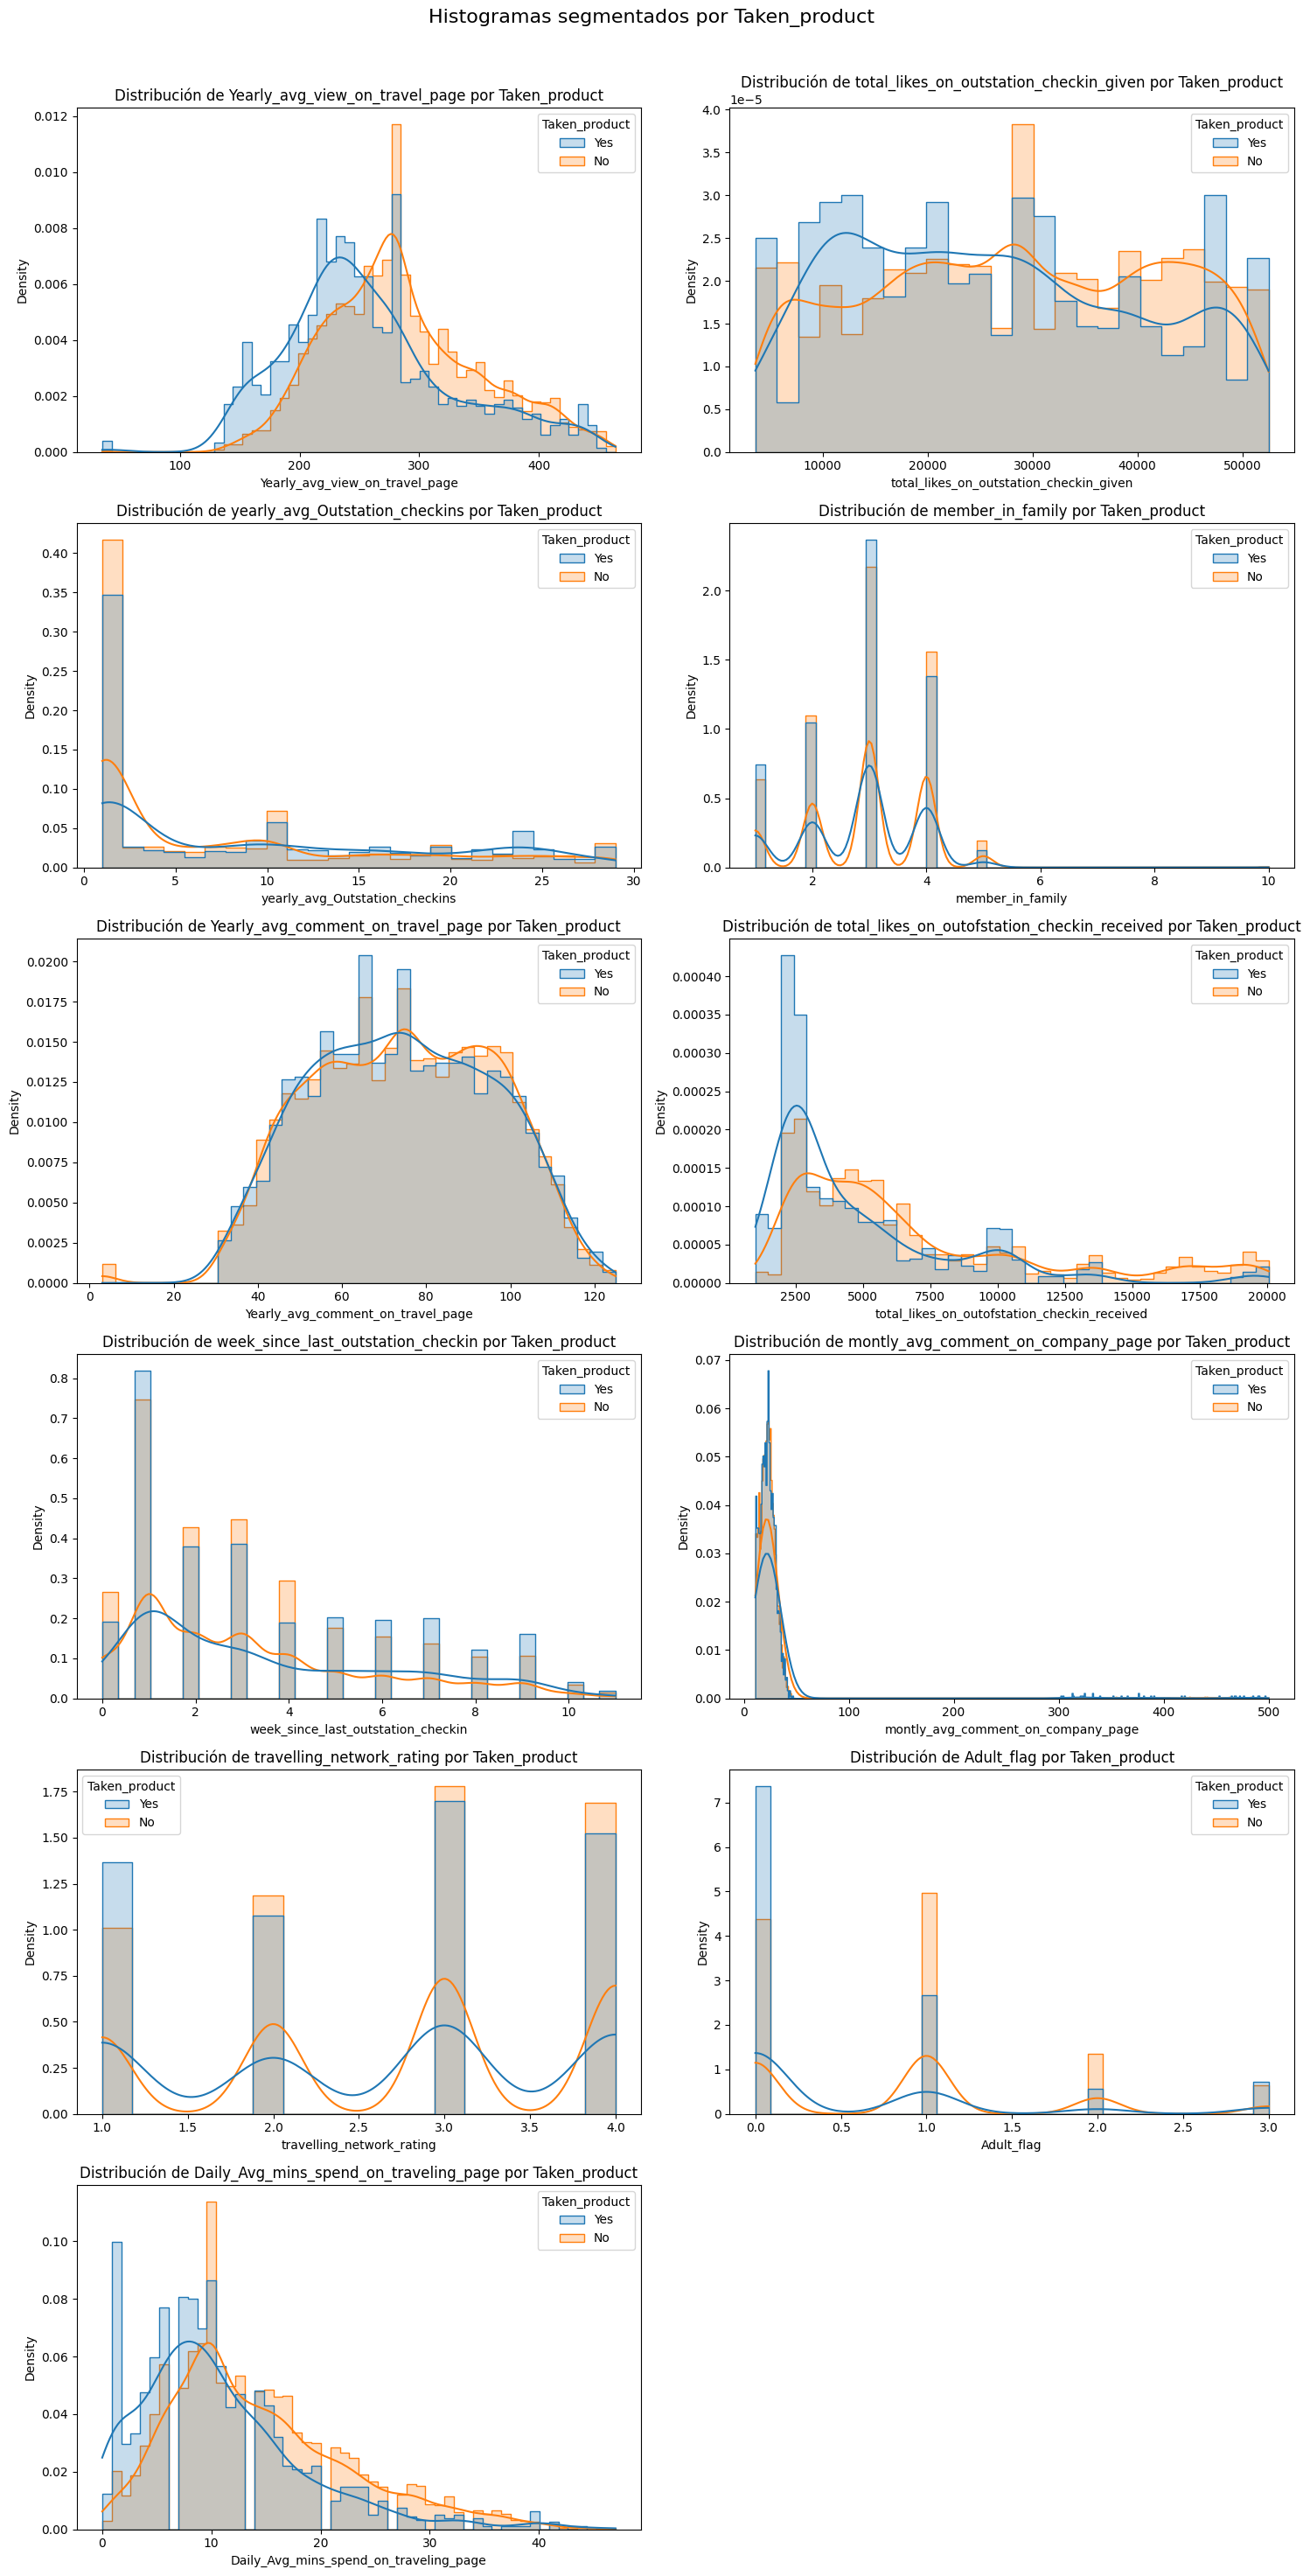

In [ ]:
# Columnas numéricas excluyendo User Id y Taken_Product

columnas = df.select_dtypes(include=[np.number]).columns.drop(['UserID'], errors='ignore')

n = len(columnas)
nrows = int(np.ceil(n / 2))
ncols = min(n, 2)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(columnas):
    sns.histplot(
        data=df,
        x=col,
        hue='Taken_product',
        kde=True,                # curva de densidad
        element="step",          # estilo de barra "step"
        stat="density",          # normaliza a densidad
        common_norm=False,       # cada grupo tiene su propia normalización
        ax=axes[i]
    )
    axes[i].set_title(f'Distribución de {col} por Taken_product')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Histogramas segmentados por Taken_product', fontsize=16)
plt.show()


En esta parte se hicieron gráficos de barras para todas las variables numéricas, menos 'UserID' y 'Taken_product'. Los histogramas muestran cómo se distribuyen los datos para cada variable y están separados según el tipo de producto que eligió el usuario ('Taken_product'). Además, se agregaron líneas que representan la densidad de los datos para ayudar a ver mejor la forma de la distribución. Esto sirve para comparar cómo varían las variables entre los diferentes productos y entender mejor el comportamiento de los usuarios.

Se puede destacar que hay ciertas variables que parecen mostrar diferencias interesantes entre clientes que sí compraron y los que no:\
**Yearly_avg_view_on_travel_page:** La distribución de quienes compraron presenta un pico más definido y ligeramente desplazado hacia valores más altos respecto a los que no compraron. Esto sugiere que visitar más la página de viajes podría estar asociado con mayor probabilidad de compra.\
**Yearly_avg_Outstation_checkins:** la distribución para lo que si compraron parece un poco más dispersa y con más valores en la parte alta. Esto podría significar que hacer más check-ins está relacionado con la compra.\
**Week_since_last_outstation_checkin:** los que compraron tienden a tener valores más bajos (menos semanas desde el último check-in).\
**Daily_Avg_mins_spend_on_traveling_page:** aunque ambas distribuciones comparten una forma similar, los usuarios que sí compraron muestran mayor concentración en valores medios y altos (30–60 minutos diarios). Esto sugiere que un uso más prolongado diario podría estar vinculado con mayor intención o probabilidad de compra.

**Matriz de correlación para las variables numéricas**

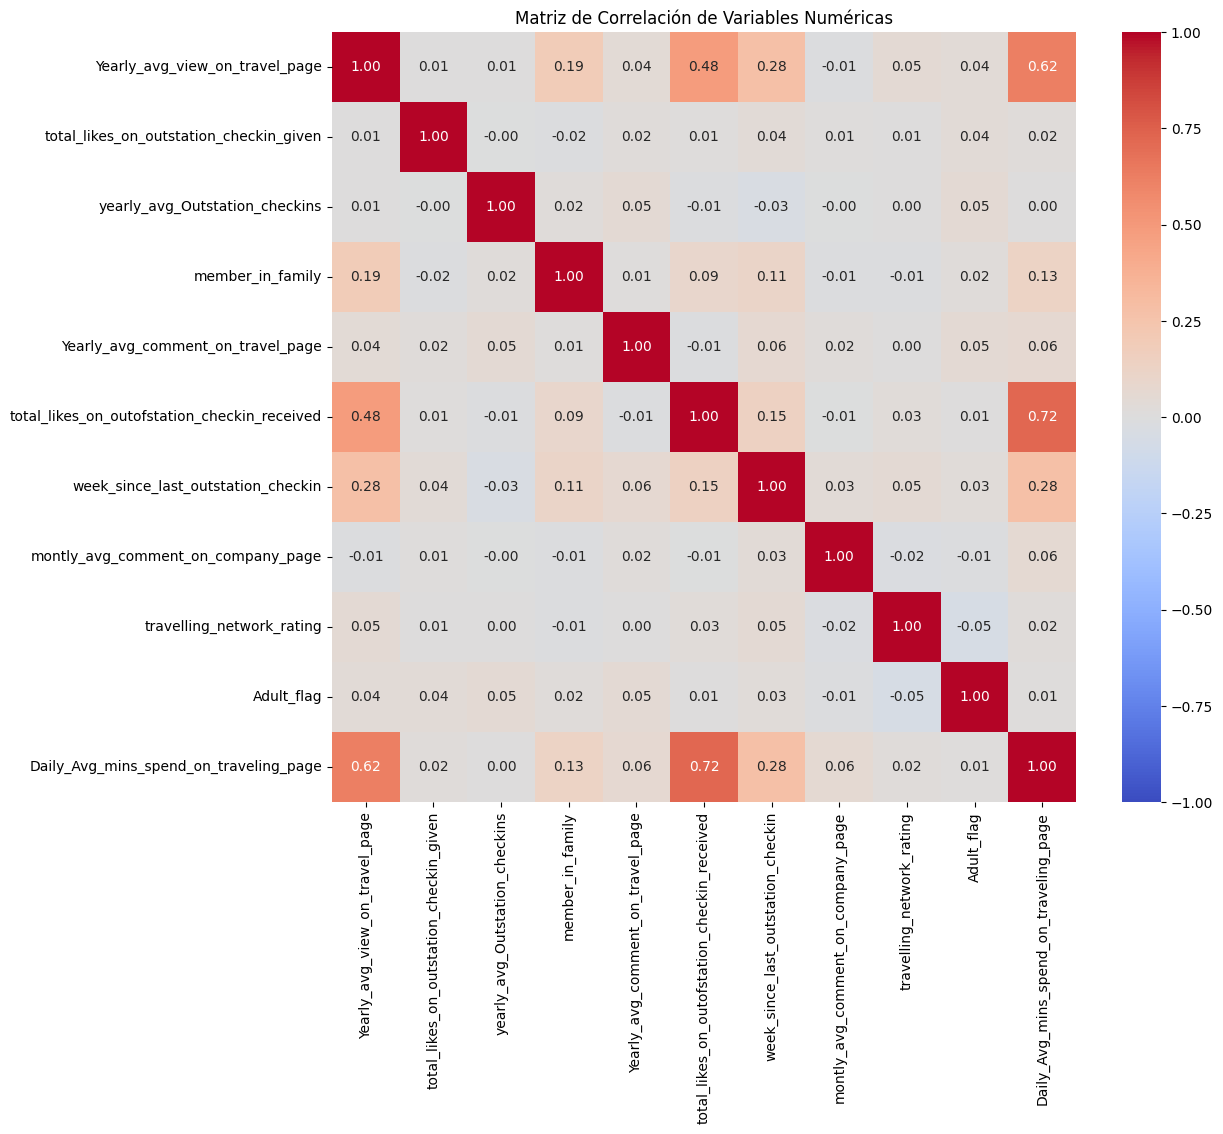

In [ ]:
columnas = df.select_dtypes(include=[np.number])

correlation_matrix = columnas.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

En este bloque de código se calculó y se visualizó la matriz de correlación entre todas las variables numéricas del dataset. La correlación mide qué tan relacionadas están dos variables; puede ir desde -1 (relación negativa perfecta) hasta 1 (relación positiva perfecta). Luego, se creó un mapa de calor (“heatmap”) para mostrar estas correlaciones de forma visual, se usó una escala de colores: los tonos rojos indican correlaciones positivas fuertes y los azules, correlaciones negativas fuertes. **Esto es útil para identificar variables que pueden influirse entre sí, detectar redundancias y decidir cuáles incluir o excluir en análisis o modelos posteriores.**

A partir de este análisis se pueden apreciar:\
**Correlaciones altas (positivas):**\
**Yearly_avg_view_on_travel_page y Daily_Avg_mins_spend_on_traveling_page** tienen una correlación positiva de 0.62. Esto es lógico ya que quienes ven más la página de viajes al año también tienden a pasar más minutos diarios en ella.\
**total_likes_on_outstation_checkin_received y Daily_Avg_mins_spend_on_traveling_page** tienen una correlación positiva de 0.72. Esta es la correlación más alta del conjunto. Sugiere que el tiempo invertido en la página está fuertemente asociado con recibir más likes.\
**Yearly_avg_view_on_travel_page y total_likes_on_outstation_checkin_received**, su correlación es de 0.48. Más vistas en la página de viajes se asocian con más likes recibidos.


**Correlaciones moderadas:**\
**Yearly_avg_view_on_travel_page y week_since_last_outstation_checkin** presentan una correlación moderada de 0.28. Quienes más visitan la página podrían tener un check-in más reciente.\
**week_since_last_outstation_checkin y Daily_Avg_mins_spend_on_traveling_page** también tienen una correlación de 0.28. Quienes tuvieron un check-in reciente podrían estar más activos en la página.


**Tabla de contingencias para variables categóricas segmentando por Taken_product**


Proporción de 'Yes' por categoría en preferred_device

Taken_product           No       Yes
preferred_device                    
Other             0.750000  0.250000
Laptop            0.750903  0.249097
Mobile            0.846558  0.153442
Tab               0.850431  0.149569


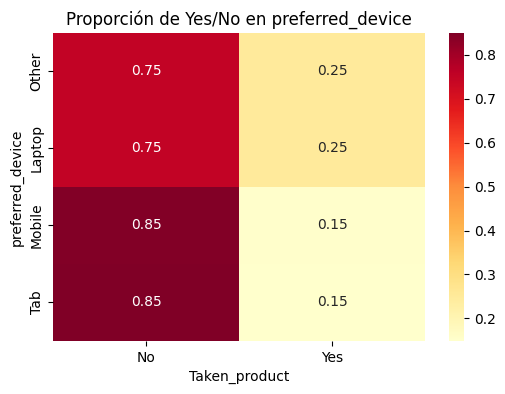


Proporción de 'Yes' por categoría en preferred_location_type

Taken_product                  No       Yes
preferred_location_type                    
OTT                      0.428571  0.571429
Tour and Travel          0.702128  0.297872
Hill Stations            0.740741  0.259259
Trekking                 0.757576  0.242424
Entertainment            0.762000  0.238000
Tour  Travel             0.762712  0.237288
Social media             0.777236  0.222764
Big Cities               0.779874  0.220126
Movie                    0.800000  0.200000
Financial                0.853042  0.146958
Beach                    0.853135  0.146865
Historical site          0.864224  0.135776
Other                    0.865204  0.134796
Medical                  0.865438  0.134562
Game                     0.916667  0.083333


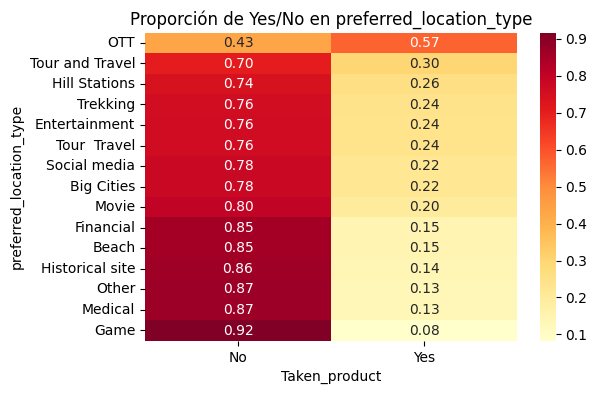


Proporción de 'Yes' por categoría en following_company_page

Taken_product                 No       Yes
following_company_page                    
Yes                     0.694734  0.305266
No                      0.895467  0.104533


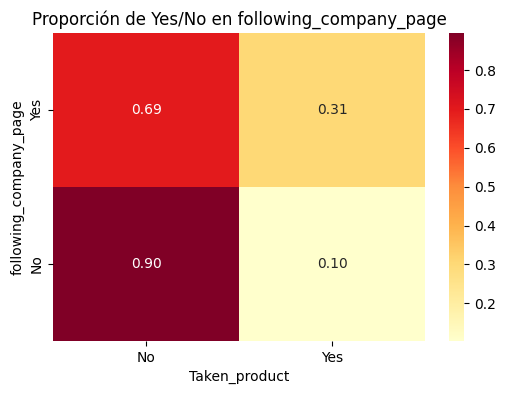


Proporción de 'Yes' por categoría en working_flag

Taken_product        No       Yes
working_flag                     
Yes            0.835762  0.164238
No             0.839300  0.160700


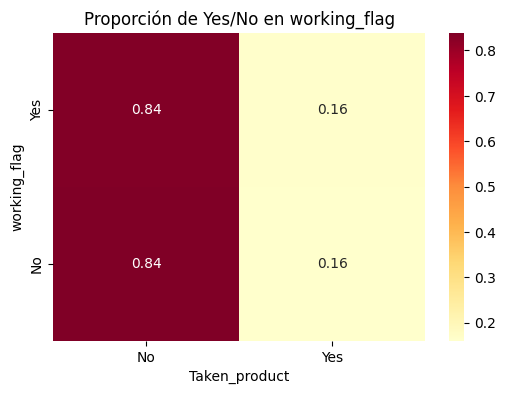

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.drop(['UserID', 'Taken_product'], errors='ignore')

for col in cat_cols:
    print(f"\nProporción de 'Yes' por categoría en {col}\n")

    # Crosstab con proporciones por fila
    tabla = pd.crosstab(df[col], df['Taken_product'], normalize='index')

    # Reordenar filas según proporción de 'Yes'
    if 'Yes' in tabla.columns:
        tabla = tabla.sort_values(by='Yes', ascending=False)

    print(tabla)

    # Heatmap con proporciones
    plt.figure(figsize=(6, 4))
    sns.heatmap(tabla, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title(f'Proporción de Yes/No en {col}')
    plt.xlabel('Taken_product')
    plt.ylabel(col)
    plt.show()

Se seleccionaron todas las columnas categóricas, excepto 'UserID' y 'Taken_product'. Para cada una de estas columnas, se calculó la proporción de usuarios que dijeron “Yes” o “No” en relación al producto que tomaron ('Taken_product'). Con tablas cruzadas, se muestra qué porcentaje de cada categoría eligió cada producto. Luego, se ordenaron estas tablas para ver primero las categorías con más “Yes”. Por último, se crearon mapas de calor para visualizar estas proporciones con colores, y los tonos más fuertes indican mayores porcentajes. **Esta visualización ayuda a identificar patrones entre variables categóricas y el producto tomado, y qué categorías están más asociadas con la elección del producto.**

**preferred_device:** usuarios que usan dispositivos móbiles o tablets tienen una probabilidad mucho menor de comprar que aquellos que usan Laptop u otros dispositivos no icluidos en el análisis.\
**preferred_location_type:** la categoría "OTT" se destaca del resto ya que su proporción de usuarios que compran es del 57%, muy superior al resto. Otras categorías como "Tour and Travel" y "Hill Stations" también tienen proporciones altas de compradores. En cambio, "Other", "Medical" y "Game" presentan las proporciones más bajas de usuarios que adquieren el producto.\
**following_company_page:** quienes siguen la página de la empresa tienen 31% de probabilidad de tomar el producto, frente al 10% de quienes no la siguen.\
**working_flag:** no parece haber relación entre esta variable y Taken_product.


In [ ]:
df.shape

(11560, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11560 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11560 non-null  object 
 1   Taken_product                                 11560 non-null  object 
 2   Yearly_avg_view_on_travel_page                11560 non-null  float64
 3   preferred_device                              11560 non-null  object 
 4   total_likes_on_outstation_checkin_given       11560 non-null  float64
 5   yearly_avg_Outstation_checkins                11560 non-null  Int64  
 6   member_in_family                              11560 non-null  int64  
 7   preferred_location_type                       11560 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11560 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11560 non-null  int6

In [ ]:
df.describe()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,11560.000000,11560.000000,11560.0,11560.000000,11560.000000,11560.000000,11560.000000,11560.000000,11560.000000,11560.0,11560.000000
mean,280.897232,28116.607007,8.218253,2.919550,74.688408,6533.758910,3.208304,28.801644,2.711159,0.794464,13.775779
std,66.458319,13866.374919,8.645163,1.045102,21.518956,4710.126969,2.617040,48.881006,1.081447,0.852047,8.328943
min,35.000000,3570.000000,1.0,1.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.0,0.000000
25%,233.000000,16618.750000,1.0,2.000000,57.000000,2938.000000,1.000000,17.000000,2.000000,0.0,8.000000
50%,275.000000,28076.000000,4.0,3.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.0,12.000000
75%,322.000000,40112.250000,14.0,4.000000,92.000000,8398.250000,5.000000,28.000000,4.000000,1.0,18.000000
max,464.000000,52512.000000,29.0,10.000000,125.000000,20065.000000,11.000000,500.000000,4.000000,3.0,47.000000




---



# Entrega 2

---



# Análisis de componentes principales (ACP)

Seleccionamos variables numéricas

In [ ]:
num_cols = [
    "Yearly_avg_view_on_travel_page",
    "total_likes_on_outstation_checkin_given",
    "yearly_avg_Outstation_checkins",
    "member_in_family",
    "Yearly_avg_comment_on_travel_page",
    "total_likes_on_outofstation_checkin_received",
    "week_since_last_outstation_checkin",
    "montly_avg_comment_on_company_page",
    "travelling_network_rating",
    "Adult_flag",
    "Daily_Avg_mins_spend_on_traveling_page"
]

In [ ]:
X_num = df[num_cols]

Estandarizamos la base de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

Aplicamos PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
print("Varianza de cada componente (valores propios):",pca.explained_variance_)

Varianza de cada componente (valores propios): [2.40256727 1.12070103 1.03792919 1.02707835 1.00698503 0.99277456
 0.94230355 0.91174116 0.82628943 0.49183225 0.24074983]


In [ ]:
# Teniendo en cuenta el criterio de tomar los valores propios mayores o iguales a 1 deberíamos elegir 5 o 6 componenetes.

In [ ]:

print("Varianza explicada:", pca.explained_variance_ratio_)

Varianza explicada: [0.21839631 0.1018731  0.09434904 0.09336268 0.09153617 0.09024443
 0.08565655 0.08287839 0.07511072 0.04470816 0.02188445]


In [ ]:
# Para poder explicar el 80% de la variabilidad original de los datos se deben tomar 8 componentes

El PCA es útil para entender patrones globales y reducir dimensionalidad, pero en este caso la capacidad de separar las clases es limitada.

Esto no significa que las variables no sean útiles, sino que la relación con la compra probablemente sea no lineal o requiera combinaciones más complejas de variables. También nos indica que las variables cuantitativas no están muy correlacionadas entre si.\

Las diferencias en el comportamiento de compra no se explican de forma lineal y simple por las variables numéricas, por lo que será necesario aplicar modelos de clasificación más complejos para capturar patrones relevantes.


# Regresión Logística

Decidimos, como primera aproximación, implementar un modelo de clasificación lineal usando la regresión logísitica. Los dos grupos se definen en base a la columna Taken_product (Yes/No).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import (
    confusion_matrix, classification_report
)

# 1) Variables: X / y
# Definimos como X todas las columnas menos UserID y Taken_product
# Definimos como y (variable objetivo) a la columna Taken_product y la convertimos en binaria. 0 = No, 1 = Yes
X = df.drop(columns=["UserID", "Taken_product"])
y = df["Taken_product"].map({"No": 0, "Yes": 1}).astype(int)

# 2) Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% hold-out
    stratify=y,             # mantiene el balance de clases
    random_state=42
)

# 3) Separamos en columnas numéricas y categóricas
num_cols = [
    "Yearly_avg_view_on_travel_page",
    "total_likes_on_outstation_checkin_given",
    "yearly_avg_Outstation_checkins",
    "member_in_family",
    "Yearly_avg_comment_on_travel_page",
    "total_likes_on_outofstation_checkin_received",
    "week_since_last_outstation_checkin",
    "montly_avg_comment_on_company_page",
    "travelling_network_rating",
    "Adult_flag",
    "Daily_Avg_mins_spend_on_traveling_page",
]
cat_cols = [
    "preferred_device",
    "preferred_location_type",
    "following_company_page",
    "working_flag",
]

# 4) Preprocesamiento
# Estandarizamos las columnas numericas para solucionar los problemas de diferentes escalas.
# Con OneHotEncoder convertimos las variables categóricas en columnas binarias
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ]
)

# 5) Armamos el pipeline con el modelo de regresión logistica
# Agregamos class_weight="balanced" ya que las clases Yes y No están desbalanceadas.
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=2000, n_jobs=None, class_weight="balanced"))
])

# 6) Aplicamos Cross-Validation con split = 5 para dividir 5 veces los datos en train y test. De esta forma hacemos más confiable y estable el resultado.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas via cross_validation
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = cross_validate(clf, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

print("Métricas promedio:")
for m in scoring:
    print(f"{m:>10}: {cv_results[f'test_{m}'].mean():.3f} ± {cv_results[f'test_{m}'].std():.3f}")

# 7) Predicción por CV para matriz de confusión y reporte
y_pred_cv = cross_val_predict(clf, X_train, y_train, cv=cv, n_jobs=-1)

print("\n Matriz de confusión agregada:")
print(confusion_matrix(y_train, y_pred_cv))

print("\n Métricas agregadas:")
print(classification_report(y_train, y_pred_cv, digits=3))

# 8) Entrenamos el modelo final y vemos los coeficientes
clf.fit(X_train, y_train)

# Obtenemos los nombres de las features y mostramos cuales son las 20 más influyentes en el modelo según la magnitud de su coeficiente
feat_names = clf.named_steps["preprocessor"].get_feature_names_out()
coefs = clf.named_steps["model"].coef_[0]

coef_df = pd.DataFrame({"feature": feat_names, "coef": coefs, "abs_coef": np.abs(coefs)})
coef_df = coef_df.sort_values("abs_coef", ascending=False).head(20)

print("\n== Top 20 features por |coeficiente| (modelo final) ==")
print(coef_df[["feature", "coef"]].to_string(index=False))


Métricas promedio:
  accuracy: 0.711 ± 0.017
 precision: 0.320 ± 0.018
    recall: 0.701 ± 0.032
        f1: 0.439 ± 0.020
   roc_auc: 0.781 ± 0.012

 Matriz de confusión agregada:
[[5530 2227]
 [ 446 1045]]

 Métricas agregadas:
              precision    recall  f1-score   support

           0      0.925     0.713     0.805      7757
           1      0.319     0.701     0.439      1491

    accuracy                          0.711      9248
   macro avg      0.622     0.707     0.622      9248
weighted avg      0.828     0.711     0.746      9248


== Top 20 features por |coeficiente| (modelo final) ==
                                          feature      coef
                 cat__preferred_location_type_OTT  2.045660
                  cat__following_company_page_Yes  1.428542
       cat__preferred_location_type_Entertainment  1.218358
        cat__preferred_location_type_Social media  1.211462
        cat__preferred_location_type_Tour  Travel  1.064231
     cat__preferred_locatio

In [ ]:
# Obtenemos y analizamos las métricas para Test

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)

print("\n Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n Métricas agregadas:")
print(classification_report(y_test, y_pred, digits=3))

print("\nAccuracy Test")
print(round(accuracy_score(y_test, y_pred),3))

print("\nPrecision Test")
print(round(precision_score(y_test, y_pred),3))

print("\nRecall Test")
print(round(recall_score(y_test, y_pred),3))

print("\nF1 Test")
print(round(f1_score(y_test, y_pred),3))

print("\nRoc_auc Score Test")
print(round(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]),3))



 Matriz de confusión:
[[1390  549]
 [ 100  273]]

 Métricas agregadas:
              precision    recall  f1-score   support

           0      0.933     0.717     0.811      1939
           1      0.332     0.732     0.457       373

    accuracy                          0.719      2312
   macro avg      0.633     0.724     0.634      2312
weighted avg      0.836     0.719     0.754      2312


Accuracy Test
0.719

Precision Test
0.332

Recall Test
0.732

F1 Test
0.457

Roc_auc Score Test
0.807


 Podemos decir que **no hay sobreajuste** en el modelo dada la escasa diferencia entre métricas de train y test. Las métricas en test son prácticamente iguales (o incluso ligeramente mejores) que las métricas promedio del cross-validation.

- La accuracy nos muestra que solo predijo correctamente el 71.9% de los datos. Por lo tanto, el modelo no es bueno. Además, esta métrica no es la mejor guía por el desbalance de clases.
- La precisión nos indica de todos los datos que el modelo clasificó como positivos ("Yes"), cuántos era realemente positivos. Podemos ver que es muy baja (33.2%).
- La tasa de recall o sensibilidad nos indica la capacidad del clasificador para identificar los valores del grupo positivo. Es del 73.2% que no es baja pero no permite afirmar que el modelo sea bueno. Detecta la mayoría de los compradores, pero genera muchos falsos positivos.
- Un valor similar (71.7%) dio la tasa de especificidad que es la capacidad del clasificador para identificar los valores del grupo negativo ("No").
- El f1-score es una combinación de la tasa de precisión y recall. También dio un valor muy bajo (45.7%) confirmando que el modelo no es bueno.
- El indicador del area bajo la curva ROC dio 80.7% lo que si indica que el modelo es medianamente bueno para explicar.  

En base a los coeficientes del modelo podemos ver por ejemplo que si el tipo de viaje es "OTT" aumenta en un poquito más de 2 veces las chances de comprar, si sigue a la compañía las chances de comprar aumentan 1.43 veces y si accede desde un dispositivo móvil, las chances de que compre disminuyen 1.02 veces.

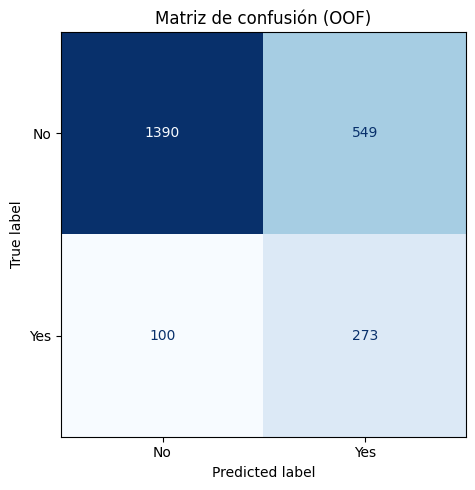

In [ ]:
# Graficamos matriz de confusión para los datos de test
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
ax.set_title("Matriz de confusión (OOF)")
plt.tight_layout()
plt.show()

Vemos que existe una gran cantidad de falsos positivos lo que afecta mucho la tasa de precisión.

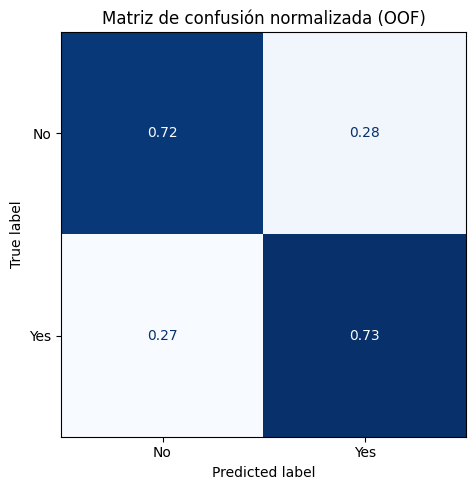

In [ ]:
import numpy as np

cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["No", "Yes"])
disp.plot(ax=ax, cmap="Blues", values_format=".2f", colorbar=False)
ax.set_title("Matriz de confusión normalizada (OOF)")
plt.tight_layout()
plt.show()

**Ahora hacemos una busqueda de los mejores parámetros para el modelo usando Gridsearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
C_values = np.logspace(-3, 2, 10)

pipe_lr = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("model", LogisticRegression(max_iter=2000))
    ]
)

# Usamos nuevamente Cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

params_lr = {
    'model__C': C_values,
    'model__solver': solver,
    'model__class_weight': ['balanced']
}

search_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=params_lr,
    scoring = "f1", # consideramos que la mejor métrica a optimizar es f1 score que es una media armónica entre recall y precision ya que las clases están desbalanceadas
    cv=cv,
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)

search_lr.fit(X_train, y_train)
print(f"Best CV score: {search_lr.best_score_:.3f}")
print("Best params:", search_lr.best_params_)
best_model = search_lr.best_estimator_



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best CV score: 0.451
Best params: {'model__C': np.float64(0.01291549665014884), 'model__class_weight': 'balanced', 'model__solver': 'newton-cg'}


**Aplicamos los nuevos parámetros**

In [ ]:
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=2000, solver='newton-cg',C=0.01291549665014884, n_jobs=None, class_weight="balanced"))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas via cross_validation
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = cross_validate(clf, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

print("Métricas promedio:")
for m in scoring:
    print(f"{m:>10}: {cv_results[f'test_{m}'].mean():.3f} ± {cv_results[f'test_{m}'].std():.3f}")

# Predicción por CV para matriz de confusión y reporte
y_pred_cv = cross_val_predict(clf, X_train, y_train, cv=cv, n_jobs=-1)

print("\n Matriz de confusión agregada:")
print(confusion_matrix(y_train, y_pred_cv))

print("\n Métricas agregadas:")
print(classification_report(y_train, y_pred_cv, digits=3))

# Entrenamos el modelo final y vemos los coeficientes
clf.fit(X_train, y_train)

# Obtenemos los nombres de las features y mostramos cuales son las 20 más influyentes en el modelo según la magnitud de su coeficiente
feat_names = clf.named_steps["preprocessor"].get_feature_names_out()
coefs = clf.named_steps["model"].coef_[0]

coef_df = pd.DataFrame({"feature": feat_names, "coef": coefs, "abs_coef": np.abs(coefs)})
coef_df = coef_df.sort_values("abs_coef", ascending=False).head(20)

print("\n== Top 20 features por |coeficiente| (modelo final) ==")
print(coef_df[["feature", "coef"]].to_string(index=False))

Métricas promedio:
  accuracy: 0.714 ± 0.018
 precision: 0.327 ± 0.015
    recall: 0.727 ± 0.025
        f1: 0.451 ± 0.014
   roc_auc: 0.781 ± 0.010

 Matriz de confusión agregada:
[[5517 2240]
 [ 407 1084]]

 Métricas agregadas:
              precision    recall  f1-score   support

           0      0.931     0.711     0.807      7757
           1      0.326     0.727     0.450      1491

    accuracy                          0.714      9248
   macro avg      0.629     0.719     0.628      9248
weighted avg      0.834     0.714     0.749      9248


== Top 20 features por |coeficiente| (modelo final) ==
                                          feature      coef
                  cat__following_company_page_Yes  1.175314
                                  num__Adult_flag -0.381140
num__total_likes_on_outofstation_checkin_received -0.362251
          num__week_since_last_outstation_checkin  0.352750
        cat__preferred_location_type_Social media  0.346700
                        cat

In [ ]:
y_pred = clf.predict(X_test)

print("\n Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n Métricas agregadas:")
print(classification_report(y_test, y_pred, digits=3))

print("\nAccuracy Test")
print(round(accuracy_score(y_test, y_pred),3))

print("\nPrecision Test")
print(round(precision_score(y_test, y_pred),3))

print("\nRecall Test")
print(round(recall_score(y_test, y_pred),3))

print("\nF1 Test")
print(round(f1_score(y_test, y_pred),3))

print("\nRoc_auc Score Test")
print(round(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]),3))


 Matriz de confusión:
[[1376  563]
 [  90  283]]

 Métricas agregadas:
              precision    recall  f1-score   support

           0      0.939     0.710     0.808      1939
           1      0.335     0.759     0.464       373

    accuracy                          0.718      2312
   macro avg      0.637     0.734     0.636      2312
weighted avg      0.841     0.718     0.753      2312


Accuracy Test
0.718

Precision Test
0.335

Recall Test
0.759

F1 Test
0.464

Roc_auc Score Test
0.804


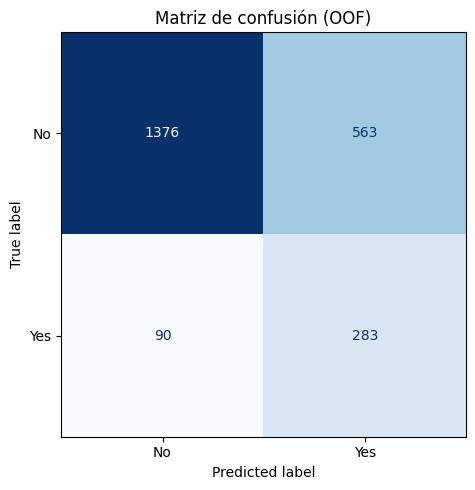

In [ ]:
# Graficamos matriz de confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
ax.set_title("Matriz de confusión (OOF)")
plt.tight_layout()
plt.show()

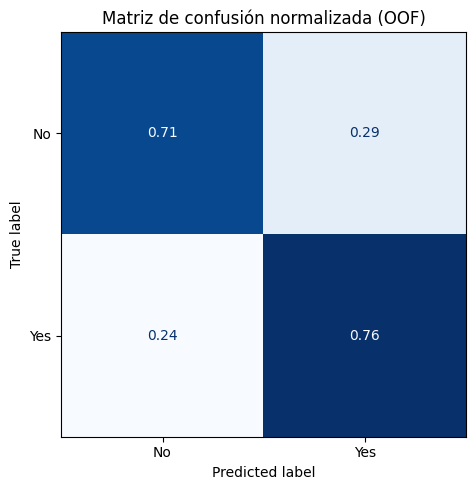

In [ ]:
import numpy as np

cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["No", "Yes"])
disp.plot(ax=ax, cmap="Blues", values_format=".2f", colorbar=False)
ax.set_title("Matriz de confusión normalizada (OOF)")
plt.tight_layout()
plt.show()

Analizando los resultados del modelo con los nuevos parámetros optimizados, podemos decir que son prácticamente los mismos. En test, el modelo no mejora y sigue siendo malo para clasificar:
- La accuracy con los nuevos parámetros bajó un poquito, pasando de 71.9% a 71.8%.  
- La precisión solo subió un 0.3% llegando a 33.5%. Esto se debe a que subieron los true y false positive pero los true positive subieron más.
- La tasa de recall o sensibilidad subió un poco más (2.7%) que indica que el modelo tiene un poco más de capacidad para identificar los valores del grupo positivo.
- La tasa de especificidad bajó 0.7%.
- El f1-score subió un 0.7% llegando a 46.4%.
- El indicador del area bajo la curva ROC dio prácticamente lo mismo, 80.7%.

Si podemos notar cambios en los coeficientes del modelo podemos ver que ahora la feature más determinante es si sigue la compañía, lo que aumenta las chances de comprar 1.17 veces.

En conclusión, el modelo logísitico es una buena base pero, al ser un modelo simple de clasificación lineal, se queda corto para clasificar correctamente y de forma confiable nuestros datos. Por lo tanto, se deberán llevar a cabo modelos más complejos como árboles de decisión o ensemble learning como Random Forest y Gradient Boosting.

---



# Entrega 3

---



## Árbol de decisión

In [ ]:
# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% hold-out
    stratify=y,             # mantiene el balance de clases
    random_state=42
)

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), cat_cols),
    ]
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

In [ ]:
# Buscamos hiperparámetros
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    "model__criterion": ["gini", "entropy"],
    "model__max_depth": [None, 6, 8, 10, 12],
    "model__min_samples_split": [2, 10, 20, 50],
    "model__min_samples_leaf": [1, 5, 10, 20],
    "model__max_features": [None, "sqrt", 0.5],
}

grid = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=cv,
    scoring="f1",
    n_jobs=-1,
)
grid.fit(X_train, y_train)

print("Mejores params:", grid.best_params_)
print("Mejor score F1:", grid.best_score_)


Mejores params: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Mejor score F1: 0.9195254991669266


In [ ]:
tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced",
        criterion='entropy',
        max_depth=None,
        max_features=None,
        min_samples_leaf=1,
        min_samples_split=2
    ))
])

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas via cross_validation
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = cross_validate(tree, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

print("Métricas promedio:")
for m in scoring:
    print(f"{m:>10}: {cv_results[f'test_{m}'].mean():.3f} ± {cv_results[f'test_{m}'].std():.3f}")

# Predicción por CV para matriz de confusión y reporte
y_pred_cv = cross_val_predict(tree, X_train, y_train, cv=cv, n_jobs=-1)

print("\n Matriz de confusión agregada:")
print(confusion_matrix(y_train, y_pred_cv))

print("\n Métricas agregadas:")
print(classification_report(y_train, y_pred_cv, digits=3))

# Entrenamos el modelo final en todos los datos y vemos los coeficientes
tree.fit(X_train, y_train)

# Buscamos las 20 features más importantes para el árbol de decisión
# Nombres de columnas transformadas
feat_names = tree.named_steps["preprocessor"].get_feature_names_out()

# Importancias del árbol
importances = tree.named_steps["model"].feature_importances_

imp_df = (
    pd.DataFrame({"feature": feat_names, "importance": importances})
      .sort_values("importance", ascending=False)
)

# Top 20
print(imp_df.head(20).to_string(index=False))


Métricas promedio:
  accuracy: 0.974 ± 0.005
 precision: 0.918 ± 0.010
    recall: 0.921 ± 0.021
        f1: 0.920 ± 0.015
   roc_auc: 0.953 ± 0.011

 Matriz de confusión agregada:
[[7635  122]
 [ 118 1373]]

 Métricas agregadas:
              precision    recall  f1-score   support

           0      0.985     0.984     0.985      7757
           1      0.918     0.921     0.920      1491

    accuracy                          0.974      9248
   macro avg      0.952     0.953     0.952      9248
weighted avg      0.974     0.974     0.974      9248

                                          feature  importance
num__total_likes_on_outofstation_checkin_received    0.245457
     num__total_likes_on_outstation_checkin_given    0.175113
              num__Yearly_avg_view_on_travel_page    0.104757
                                  num__Adult_flag    0.083242
              num__yearly_avg_Outstation_checkins    0.079297
                   num__travelling_network_rating    0.075250
         

Podemos ver que todas las métricas del modelo son altas, superiores al 90%. Esto puede ser una señal de que el modelo está sobreajustando.

También podemos ver que la feature más importante para mejorar la separación de clases en el árbol de decisión es "num__total_likes_on_outofstation_checkin_received" con una importancia de 0.24.

In [ ]:
# Evaluamos el modelo en test
y_pred = tree.predict(X_test)

print("\n Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n Métricas agregadas:")
print(classification_report(y_test, y_pred, digits=3))

print("\nAccuracy Test")
print(round(accuracy_score(y_test, y_pred),3))

print("\nPrecision Test")
print(round(precision_score(y_test, y_pred),3))

print("\nRecall Test")
print(round(recall_score(y_test, y_pred),3))

print("\nF1 Test")
print(round(f1_score(y_test, y_pred),3))

print("\nRoc_auc Score Test")
print(round(roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]),3))


 Matriz de confusión:
[[1918   21]
 [  18  355]]

 Métricas agregadas:
              precision    recall  f1-score   support

           0      0.991     0.989     0.990      1939
           1      0.944     0.952     0.948       373

    accuracy                          0.983      2312
   macro avg      0.967     0.970     0.969      2312
weighted avg      0.983     0.983     0.983      2312


Accuracy Test
0.983

Precision Test
0.944

Recall Test
0.952

F1 Test
0.948

Roc_auc Score Test
0.97


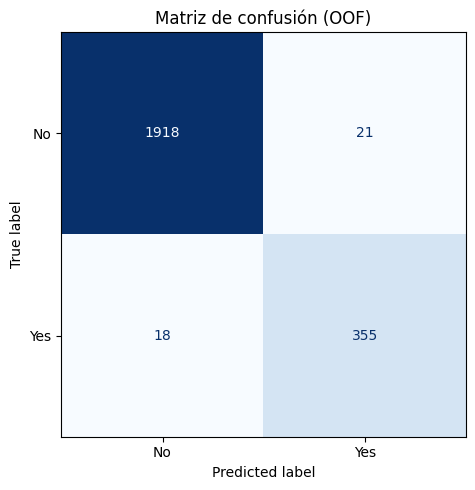

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
ax.set_title("Matriz de confusión (OOF)")
plt.tight_layout()
plt.show()

Obteniendo los scores en para test, se observa que son incluso más altos que para train y la cantidad de falsos positivos y falsos negativos es baja. Por lo tanto, el modelo **no sobreajusta**.\  
Como último paso habría que ver si no hay fuga de datos, es decir, si hay alguna feature que se derive directamente de la variable objetivo Taken_product.

In [ ]:
df_corr = df.copy()
df_corr["Taken_product"] = y  # asegurar binaria
df_corr.corr(numeric_only=True)["Taken_product"].sort_values(ascending=False).head(10)


,Taken_product
Taken_product,1.000000
yearly_avg_Outstation_checkins,0.074832
week_since_last_outstation_checkin,0.045996
montly_avg_comment_on_company_page,0.001236
Yearly_avg_comment_on_travel_page,-0.003599
member_in_family,-0.031746
travelling_network_rating,-0.046679
total_likes_on_outstation_checkin_given,-0.053425
Adult_flag,-0.137455
Yearly_avg_view_on_travel_page,-0.150734


 Se puede observar que no hay fuga de datos. No encontramos ninguna feature que se derive directamente de Taken_product ni correlaciones sospechosamente altas. Por lo tanto se concluye que el modelo funciona correctamente y clasifica bastante bien.

Procedemos a graficar la curva de entrenamiento y validación para ver como varía el f1 score ante diferentes profundidades del árbol y ver graficamente si hay sobreajuste.

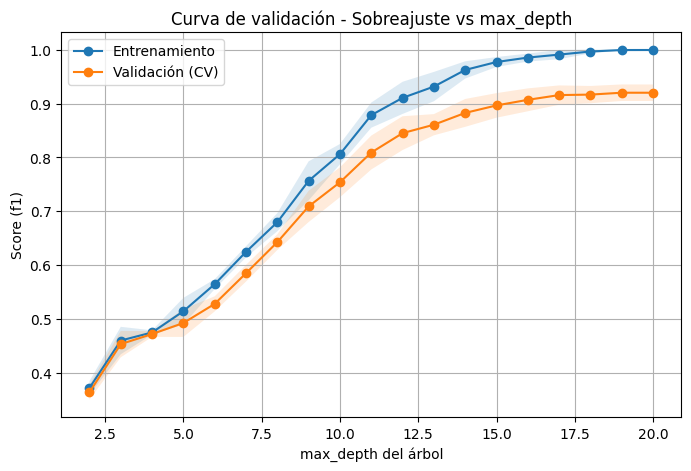

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Rango de profundidades a evaluar
max_depths = np.arange(2, 21)

# Curva de validación
train_scores, test_scores = validation_curve(
    estimator=tree,
    X=X_train, y=y_train,
    param_name="model__max_depth",
    param_range=max_depths,
    cv=cv,
    scoring="f1",
    n_jobs=-1
)

# Promedio y desvío por profundidad
train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
test_mean  = test_scores.mean(axis=1)
test_std   = test_scores.std(axis=1)

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(max_depths, train_mean, marker='o', label='Entrenamiento')
plt.fill_between(max_depths, train_mean-train_std, train_mean+train_std, alpha=0.15)
plt.plot(max_depths, test_mean, marker='o', label='Validación (CV)')
plt.fill_between(max_depths, test_mean-test_std, test_mean+test_std, alpha=0.15)
plt.xlabel('max_depth del árbol')
plt.ylabel('Score (f1)')
plt.title('Curva de validación - Sobreajuste vs max_depth')
plt.legend()
plt.grid(True)
plt.show()


Se puede ver que si hay un cierto sobreajuste a partir del max_depth 12.

Sin embargo, este sobreajuste no es dramático porque la validación no cae sino que tiende a crecer menos por lo que la diferencia con la curva de entrenamiento aumenta un poco.
Aproximadamente 12 sería una profundidad adecuada para armar el árbol de decisión.

In [ ]:
# Armamos el modelo nuevamente con max_depth= 12
tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced",
        criterion='entropy',
        max_depth= 12,
        max_features=None,
        min_samples_leaf=1,
        min_samples_split=2
    ))
])

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas via cross_validation
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = cross_validate(tree, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

print("Métricas promedio:")
for m in scoring:
    print(f"{m:>10}: {cv_results[f'test_{m}'].mean():.3f} ± {cv_results[f'test_{m}'].std():.3f}")

# Predicción por CV para matriz de confusión y reporte
y_pred_cv = cross_val_predict(tree, X_train, y_train, cv=cv, n_jobs=-1)

print("\n Matriz de confusión agregada:")
print(confusion_matrix(y_train, y_pred_cv))

print("\n Métricas agregadas:")
print(classification_report(y_train, y_pred_cv, digits=3))

# Entrenamos el modelo final en todos los datos y vemos los coeficientes
tree.fit(X_train, y_train)

Métricas promedio:
  accuracy: 0.946 ± 0.012
 precision: 0.789 ± 0.050
    recall: 0.913 ± 0.029
        f1: 0.845 ± 0.031
   roc_auc: 0.955 ± 0.014

 Matriz de confusión agregada:
[[7385  372]
 [ 130 1361]]

 Métricas agregadas:
              precision    recall  f1-score   support

           0      0.983     0.952     0.967      7757
           1      0.785     0.913     0.844      1491

    accuracy                          0.946      9248
   macro avg      0.884     0.932     0.906      9248
weighted avg      0.951     0.946     0.947      9248



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Yearly_avg_view_on_travel_page',
                                                   'total_likes_on_outstation_checkin_given',
                                                   'yearly_avg_Outstation_checkins',
                                                   'member_in_family',
                                                   'Yearly_avg_comment_on_travel_page',
                                                   'total_likes_on_outofstation_checkin_received',
                                                   'week_since_last_outstation_checkin',
                                                   'montly_avg_comme...
                                                   'travelling_network_rating',
                                                   'Adult_flag',
                                                   'Daily_Avg_mins_spend_on_traveling_page']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['preferred_device',
                                                   'preferred_location_type',
                                                   'following_company_page',
                                                   'working_flag'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=12,
                                        random_state=42))])

Por último, buscamos el umbral que maximiza el F1 score, graficamos las curvas ROC y Precision-Recall y obtenemos las métricas para test.

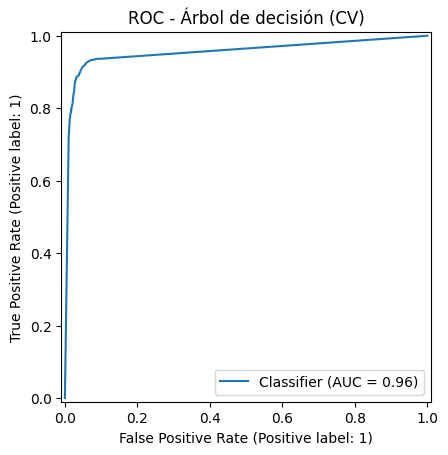

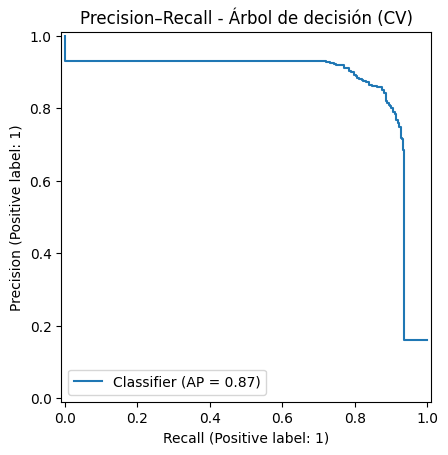

Umbral que maximiza F1 (en CV): 0.813 | F1: 0.865

Métricas en TEST con umbral óptimo:
              precision    recall  f1-score   support

           0      0.979     0.979     0.979      1939
           1      0.890     0.890     0.890       373

    accuracy                          0.965      2312
   macro avg      0.934     0.934     0.934      2312
weighted avg      0.965     0.965     0.965      2312



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve

# Probabilidades por CV
y_scores_train = cross_val_predict(tree, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

# Curva ROC
RocCurveDisplay.from_predictions(y_train, y_scores_train)
plt.title("ROC - Árbol de decisión (CV)")
plt.show()

# Curva Precision-Recall
PrecisionRecallDisplay.from_predictions(y_train, y_scores_train)
plt.title("Precision–Recall - Árbol de decisión (CV)")
plt.show()

# Elegir umbral que maximiza F1 en CV
prec, rec, thr = precision_recall_curve(y_train, y_scores_train)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1s[:-1])  # el último punto no tiene umbral
thr_opt = thr[best_idx]
print(f"Umbral que maximiza F1 (en CV): {thr_opt:.3f} | F1: {f1s[best_idx]:.3f}")

# Ahora evaluamos ese umbral en TEST
y_scores_test = tree.fit(X_train, y_train).predict_proba(X_test)[:, 1]
y_pred_test_thr = (y_scores_test >= thr_opt).astype(int)

print("\nMétricas en TEST con umbral óptimo:")
print(classification_report(y_test, y_pred_test_thr, digits=3))

El umbral óptimo es 0.813, por lo que diremos que el usuario va a comprar si su probabilidad es mayor a 0.813. Esto hace que el modelo sea más estricto y se mejore el balance entre precision y recall, es decir, entre acertar y detectar compradores.

## Conclusión

Cuando el modelo dice que el cliente comprará (clase 1), acierta el 89% de las veces, y además detecta el 89% de los compradores reales. En marketing, esto es muy bueno porque no se estarán dando promociones a usuarios que no comprarán (alta precision) y no se estarán perdiendo compradores potenciales (alta recall).\
La curva Precision–Recall es bastante alta por lo que también demuestra que muchos compradores reales están efectivamente bien rankeados por el modelo. La curva ROC es excelente por lo que el modelo distingue compradores de no compradores muy claramente.

## Random Forest

In [ ]:
# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% hold-out
    stratify=y,             # mantiene el balance de clases
    random_state=42
)

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), cat_cols),
    ]
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])



In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [8, 12, None],
    "model__min_samples_split": [2, 10],
    "model__min_samples_leaf": [1, 5],
    "model__max_features": ["sqrt"],
    "model__criterion": ["gini"],
}

grid = GridSearchCV(
    estimator=rf_pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="f1",
    n_jobs=-1,
    refit=True,
    verbose=1
)

grid.fit(X_train, y_train)

print("Mejores params RF:", grid.best_params_)
print("Mejor F1 (CV=5):", grid.best_score_)

best_rf = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores params RF: {'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 300}
Mejor F1 (CV=5): 0.911316337630884


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

scoring = ["accuracy", "precision", "recall", "f1", "roc_auc", "average_precision"]
cv_results = cross_validate(best_rf, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("\n=== Métricas promedio (CV=5) - Random Forest ===")
for m in scoring:
    print(f"{m:>17}: {cv_results[f'test_{m}'].mean():.3f} ± {cv_results[f'test_{m}'].std():.3f}")

# Predicciones por CV para matriz/reporte
y_pred_cv = cross_val_predict(best_rf, X_train, y_train, cv=cv, n_jobs=-1)
print("\nMatriz de confusión (CV):")
print(confusion_matrix(y_train, y_pred_cv))

print("\nReporte de clasificación (CV):")
print(classification_report(y_train, y_pred_cv, digits=3))


=== Métricas promedio (CV=5) - Random Forest ===
         accuracy: 0.973 ± 0.004
        precision: 0.972 ± 0.018
           recall: 0.858 ± 0.018
               f1: 0.911 ± 0.012
          roc_auc: 0.996 ± 0.001
average_precision: 0.983 ± 0.005

Matriz de confusión (CV):
[[7719   38]
 [ 211 1280]]

Reporte de clasificación (CV):
              precision    recall  f1-score   support

           0      0.973     0.995     0.984      7757
           1      0.971     0.858     0.911      1491

    accuracy                          0.973      9248
   macro avg      0.972     0.927     0.948      9248
weighted avg      0.973     0.973     0.972      9248



In [ ]:
# Evaluamos el modelo en test
y_pred = best_rf.predict(X_test)

print("\n Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n Métricas agregadas:")
print(classification_report(y_test, y_pred, digits=3))

print("\nAccuracy Test")
print(round(accuracy_score(y_test, y_pred),3))

print("\nPrecision Test")
print(round(precision_score(y_test, y_pred),3))

print("\nRecall Test")
print(round(recall_score(y_test, y_pred),3))

print("\nF1 Test")
print(round(f1_score(y_test, y_pred),3))

print("\nRoc_auc Score Test")
print(round(roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]),3))


 Matriz de confusión:
[[1936    3]
 [  29  344]]

 Métricas agregadas:
              precision    recall  f1-score   support

           0      0.985     0.998     0.992      1939
           1      0.991     0.922     0.956       373

    accuracy                          0.986      2312
   macro avg      0.988     0.960     0.974      2312
weighted avg      0.986     0.986     0.986      2312


Accuracy Test
0.986

Precision Test
0.991

Recall Test
0.922

F1 Test
0.956

Roc_auc Score Test
0.999


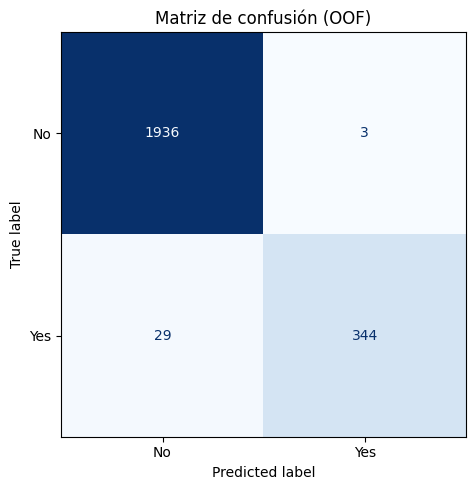

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
ax.set_title("Matriz de confusión (OOF)")
plt.tight_layout()
plt.show()

Podemos ver que los resultados en test son muy buenos y mejoran con respecto a los de entrenamiento, por lo que el modelo no sobreajusta.\
Tiene una precision casi perfecta, cuando el modelo dice “este cliente comprará”, acierta el 99% de las veces.\
Detecta 92% de los compradores reales (recall), se pierden muy pocos.\
En resumen, el modelo identifica muy bien a quién vale la pena recomendarle el producto o hacerle promociones.


Es importante observar que el recall en este modelo cae un poco con respecto al árbol de decisión.\
El árbol de decisión tenía mayor recall (detectaba más compradores) pero el random forest tiene más precision. Esto se puede ver también en la matriz de confusión donde bajó la cantidad de falsos positivos pero subió la cantidad de falsos negativos.\
Podemos afirmar que el random forest se volvió más conservador.\
Si la campaña de marketing es cara, esto es bueno ya que evitaremos contactar gente que no compra.

Buscamos el umbral que maximiza el F1 score, graficamos las curvas ROC y Precision-Recall y obtenemos las métricas para test.

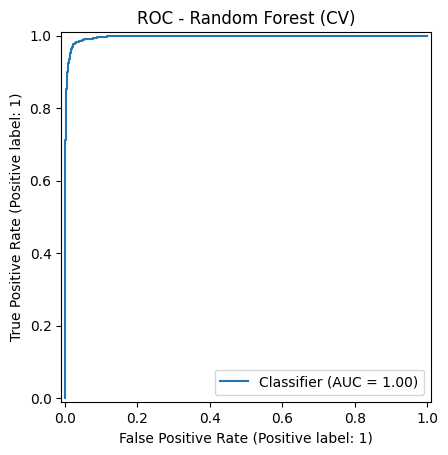

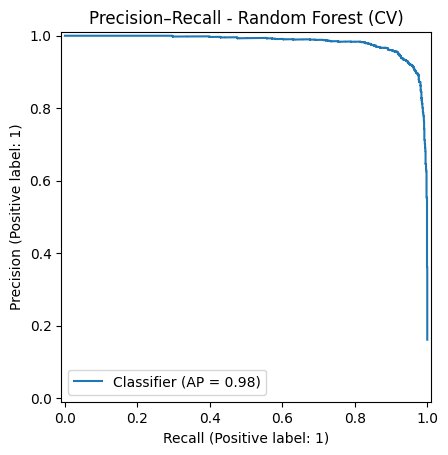

Umbral que maximiza F1 (en CV): 0.385 | F1: 0.938

Métricas en TEST con umbral óptimo:
              precision    recall  f1-score   support

           0      0.993     0.989     0.991      1939
           1      0.945     0.965     0.955       373

    accuracy                          0.985      2312
   macro avg      0.969     0.977     0.973      2312
weighted avg      0.985     0.985     0.985      2312



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve

# Probabilidades por CV
y_scores_train = cross_val_predict(best_rf, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

# Curva ROC
RocCurveDisplay.from_predictions(y_train, y_scores_train)
plt.title("ROC - Random Forest (CV)")
plt.show()

# Curva Precision-Recall
PrecisionRecallDisplay.from_predictions(y_train, y_scores_train)
plt.title("Precision–Recall - Random Forest (CV)")
plt.show()

# Elegir umbral que maximiza F1 en CV
prec, rec, thr = precision_recall_curve(y_train, y_scores_train)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1s[:-1])  # el último punto no tiene umbral
thr_opt = thr[best_idx]
print(f"Umbral que maximiza F1 (en CV): {thr_opt:.3f} | F1: {f1s[best_idx]:.3f}")

# Ahora evaluamos ese umbral en TEST
y_scores_test = best_rf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
y_pred_test_thr = (y_scores_test >= thr_opt).astype(int)

print("\nMétricas en TEST con umbral óptimo:")
print(classification_report(y_test, y_pred_test_thr, digits=3))

El umbral óptimo es 0.385, esto significa que el modelo tiende a asignar probabilidades moderadas (no muy altas) a la clase positiva. Si se usara el umbral por defecto de 0.5 se perderían positivos.\
Al bajar el umbral, baja la precision (sigue siendo muy buena) y aumenta el recall.


Analizamos cuáles son las 20 features más importantes para el modelo.

In [ ]:
best_rf.fit(X_train, y_train)

# Nombres de features transformadas
feat_names = best_rf.named_steps["preprocessor"].get_feature_names_out()

rf_imp = best_rf.named_steps["model"].feature_importances_

# Top 20
top_imp = (pd.DataFrame({"feature": feat_names, "importance": rf_imp})
           .sort_values("importance", ascending=False)
           .head(20))
print("\n== Top 20 features por importancia (RF) ==")
print(top_imp.to_string(index=False))

# ---- Agregar por columna original ----
orig_map = []
for f in feat_names:
    # separar por el nombre del transformador
    if f.startswith("num__"):
        orig = f.replace("num__","")             # numérica original
    elif f.startswith("cat__"):
        # f = "cat__<col>_<categoria>"
        rest = f.replace("cat__","")
        orig = rest.split("_", 1)[0]             # nombre de la columna categórica original
    else:
        orig = f
    orig_map.append(orig)

agg_imp = (pd.DataFrame({"feature_transformed": feat_names,
                         "orig_feature": orig_map,
                         "rf_importance": rf_imp})
           .groupby("orig_feature", as_index=False)["rf_importance"].sum()
           .sort_values("rf_importance", ascending=False))

print("\n== Importancia agregada por columna original (RF) ==")
print(agg_imp.head(20).to_string(index=False))



== Top 20 features por importancia (RF) ==
                                          feature  importance
num__total_likes_on_outofstation_checkin_received    0.165917
     num__total_likes_on_outstation_checkin_given    0.115727
              num__Yearly_avg_view_on_travel_page    0.111029
                  cat__following_company_page_Yes    0.084168
                                  num__Adult_flag    0.073625
              num__yearly_avg_Outstation_checkins    0.069342
      num__Daily_Avg_mins_spend_on_traveling_page    0.069240
           num__Yearly_avg_comment_on_travel_page    0.060311
          num__week_since_last_outstation_checkin    0.053717
                   num__travelling_network_rating    0.043522
                            num__member_in_family    0.040208
          num__montly_avg_comment_on_company_page    0.031830
                            cat__working_flag_Yes    0.012650
             cat__preferred_location_type_Medical    0.008040
     cat__preferred_locati

En este modelo también la feature más importante para mejorar la separación de clases es "num__total_likes_on_outofstation_checkin_received" con una importancia un poco más baja de 0.1659

## Conclusión

El recall mejora con respecto al árbol de decisión. Ahora su valor es de 0.965. Esto es excelente ya que identifica casi todos los usuarios que van a comprar.\
La precision también mejora, asumiendo un valor de 0.945.\
El f1 score aumenta a 0.955, logrando un muy buen equilibrio entre no perder compradores y no contactar demás.\
Analizando las curvas ROC y Precision-Recall, podemos afirmar que el modelo separa extremadamente bien ambas clases.

## XG Boost

In [ ]:
!pip -q install xgboost

In [ ]:
# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% hold-out
    stratify=y,             # mantiene el balance de clases
    random_state=42
)

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), cat_cols),
    ]
)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

# Desbalance: ratio de negativos/positivos
pos = y.sum()
neg = len(y) - pos
spw = neg / pos

xgb_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        tree_method="hist",
        n_estimators=400,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_alpha=0.0,
        reg_lambda=1.0,
        max_depth=6,
        min_child_weight=1.0,
        scale_pos_weight=spw,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_dist = {
    "model__n_estimators": randint(200, 600),
    "model__learning_rate": uniform(0.02, 0.18),
    "model__max_depth": randint(2, 6),            # cortamos en 5 para evitar sobreajuste
    "model__min_child_weight": uniform(1, 6),
    "model__subsample": uniform(0.6, 0.4),
    "model__colsample_bytree": uniform(0.6, 0.4),
    "model__reg_alpha": uniform(0.0, 0.5),        # L1
    "model__reg_lambda": uniform(0.5, 1.0),       # L2
    "model__scale_pos_weight": uniform(spw*0.5, spw)
}

search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    n_iter=40,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    refit=True
)

search.fit(X_train, y_train)

print("Mejores params XGB:", search.best_params_)
print("Mejor F1 (CV=5):", search.best_score_)
best_xgb = search.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Mejores params XGB: {'model__colsample_bytree': np.float64(0.8883759697008518), 'model__learning_rate': np.float64(0.07545094253343006), 'model__max_depth': 5, 'model__min_child_weight': np.float64(1.5620486069685549), 'model__n_estimators': 570, 'model__reg_alpha': np.float64(0.3181663090929477), 'model__reg_lambda': np.float64(0.7504618186055841), 'model__scale_pos_weight': np.float64(5.669199430229096), 'model__subsample': np.float64(0.9915571433100037)}
Mejor F1 (CV=5): 0.9765519662282293


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

scoring = ["accuracy", "precision", "recall", "f1", "roc_auc", "average_precision"]
cv_results = cross_validate(best_xgb, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("\n=== Métricas promedio (CV=5) - XGBoost ===")
for m in scoring:
    print(f"{m:>17}: {cv_results[f'test_{m}'].mean():.3f} ± {cv_results[f'test_{m}'].std():.3f}")

y_pred_cv = cross_val_predict(best_xgb, X_train, y_train, cv=cv, n_jobs=-1)
print("\nMatriz de confusión (CV):")
print(confusion_matrix(y_train, y_pred_cv))

print("\nReporte de clasificación (CV):")
print(classification_report(y_train, y_pred_cv, digits=3))



=== Métricas promedio (CV=5) - XGBoost ===
         accuracy: 0.992 ± 0.002
        precision: 0.975 ± 0.008
           recall: 0.978 ± 0.008
               f1: 0.977 ± 0.006
          roc_auc: 0.999 ± 0.001
average_precision: 0.997 ± 0.002

Matriz de confusión (CV):
[[7720   37]
 [  33 1458]]

Reporte de clasificación (CV):
              precision    recall  f1-score   support

           0      0.996     0.995     0.995      7757
           1      0.975     0.978     0.977      1491

    accuracy                          0.992      9248
   macro avg      0.985     0.987     0.986      9248
weighted avg      0.992     0.992     0.992      9248



In [ ]:
# Evaluamos el modelo en test
y_pred = best_xgb.predict(X_test)

print("\n Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n Métricas agregadas:")
print(classification_report(y_test, y_pred, digits=3))

print("\nAccuracy Test")
print(round(accuracy_score(y_test, y_pred),3))

print("\nPrecision Test")
print(round(precision_score(y_test, y_pred),3))

print("\nRecall Test")
print(round(recall_score(y_test, y_pred),3))

print("\nF1 Test")
print(round(f1_score(y_test, y_pred),3))

print("\nRoc_auc Score Test")
print(round(roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]),3))


 Matriz de confusión:
[[1935    4]
 [   9  364]]

 Métricas agregadas:
              precision    recall  f1-score   support

           0      0.995     0.998     0.997      1939
           1      0.989     0.976     0.982       373

    accuracy                          0.994      2312
   macro avg      0.992     0.987     0.990      2312
weighted avg      0.994     0.994     0.994      2312


Accuracy Test
0.994

Precision Test
0.989

Recall Test
0.976

F1 Test
0.982

Roc_auc Score Test
1.0


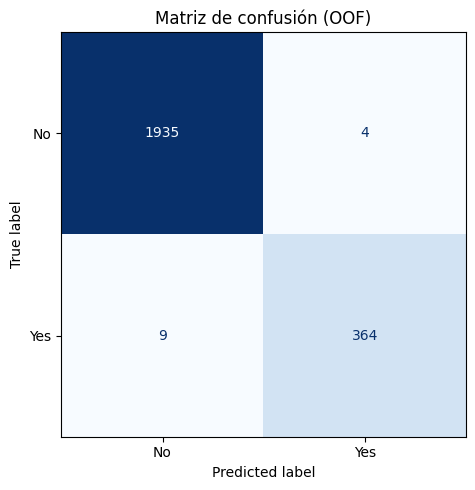

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
ax.set_title("Matriz de confusión (OOF)")
plt.tight_layout()
plt.show()

Podemos ver que el modelo está funcionando muy bien, no sobreajusta y las métricas mejoraron con respecto al Random Forest.\
Recall (0.976), Precision (0.989) y F1 (0.982)  son muy altos. Solo hay 4 falsos positivos y 9 falsos negativos por lo que las clases están muy bien aprendidas.

Buscamos el umbral que maximiza el F1 score, graficamos las curvas ROC y Precision-Recall y obtenemos las métricas para test.

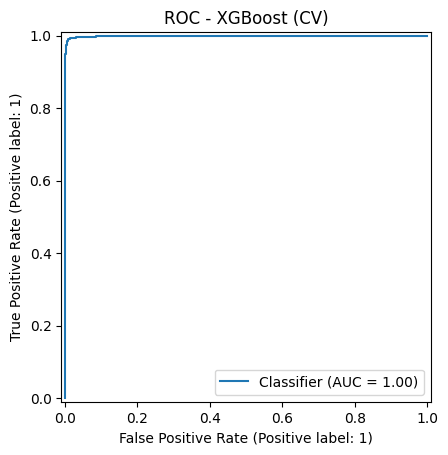

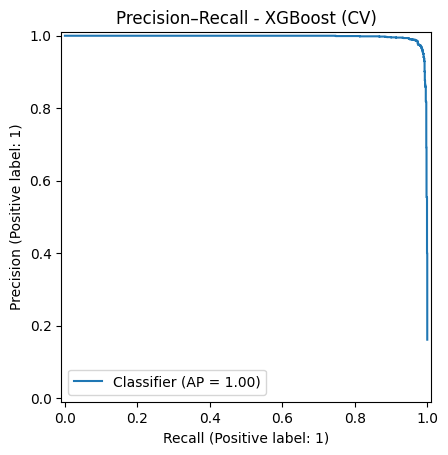

Umbral que maximiza F1 (en CV): 0.595 | F1: 0.979

Métricas en TEST con umbral óptimo:
              precision    recall  f1-score   support

           0      0.995     0.998     0.997      1939
           1      0.992     0.976     0.984       373

    accuracy                          0.995      2312
   macro avg      0.994     0.987     0.990      2312
weighted avg      0.995     0.995     0.995      2312



In [ ]:
y_scores_train = cross_val_predict(
    best_xgb, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

# Curvas
RocCurveDisplay.from_predictions(y_train, y_scores_train)
plt.title("ROC - XGBoost (CV)")
plt.show()

PrecisionRecallDisplay.from_predictions(y_train, y_scores_train)
plt.title("Precision–Recall - XGBoost (CV)")
plt.show()

# Umbral que maximiza F1 en TRAIN (CV)
prec, rec, thr = precision_recall_curve(y_train, y_scores_train)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
thr_opt = thr[np.argmax(f1s[:-1])]
print(f"Umbral que maximiza F1 (en CV): {thr_opt:.3f} | F1: {f1s[:-1].max():.3f}")

# Evaluación en TEST
y_scores_test = best_xgb.predict_proba(X_test)[:, 1]
y_pred_test_thr = (y_scores_test >= thr_opt).astype(int)

print("\nMétricas en TEST con umbral óptimo:")
print(classification_report(y_test, y_pred_test_thr, digits=3))


El umbral óptimo que maximiza el f1 score es 0.595, es decir, el modelo clasificará como positivo a los casos con probabilidad ≥ 0.595.\
El umbral se subió con respecto al 0.5 estándar para ser más estricto al clasificar los positivos.\
Sin embargo, podemos ver que la precisión sube muy poquito y los demás scores se mantienen prácticamente igual. La performance en test (F1 ≈ 0.984) es ligeramente superior a la anterior, lo cual sugiere nada de sobreajuste.\
Por lo tanto, podemos decir que el modelo XGBoost ya está tan bien calibrado y generaliza tan bien, que el umbral 0.5 está prácticamente en el punto de equilibrio entre precisión y recall, ajustarlo no casi no cambia el rendimiento.

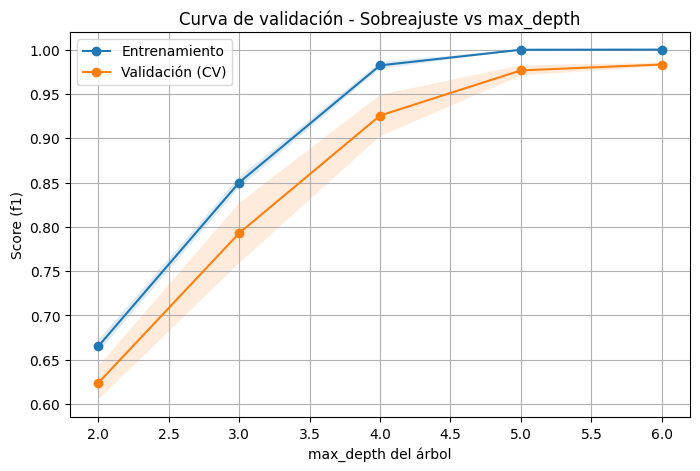

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Rango de profundidades a evaluar
max_depths = np.arange(2, 7)

# Curva de validación
train_scores, test_scores = validation_curve(
    estimator=best_xgb,
    X=X_train, y=y_train,
    param_name="model__max_depth",
    param_range=max_depths,
    cv=cv,
    scoring="f1",
    n_jobs=-1
)

# Promedio y desvío por profundidad
train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
test_mean  = test_scores.mean(axis=1)
test_std   = test_scores.std(axis=1)

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(max_depths, train_mean, marker='o', label='Entrenamiento')
plt.fill_between(max_depths, train_mean-train_std, train_mean+train_std, alpha=0.15)
plt.plot(max_depths, test_mean, marker='o', label='Validación (CV)')
plt.fill_between(max_depths, test_mean-test_std, test_mean+test_std, alpha=0.15)
plt.xlabel('max_depth del árbol')
plt.ylabel('Score (f1)')
plt.title('Curva de validación - Sobreajuste vs max_depth')
plt.legend()
plt.grid(True)
plt.show()

Analizamos cuáles son las 20 features más importantes para el modelo.

In [ ]:
# Ajustar en todos los datos para extraer importancias
best_xgb.fit(X_train, y_train)
feat_names = best_xgb.named_steps["preprocessor"].get_feature_names_out()

# GAIN (más informativo que 'weight')
booster = best_xgb.named_steps["model"].get_booster()
gain = booster.get_score(importance_type="gain")  # dict: {'f0': val, 'f12': val, ...}

# Mapear índices f{i} a nombres reales
# XGBoost asigna features en el orden de entrada:
# construimos una tabla completa y llenamos donde haya score
imp_gain = pd.DataFrame({
    "feature": feat_names,
    "gain": [gain.get(f"f{i}", 0.0) for i in range(len(feat_names))]
}).sort_values("gain", ascending=False)

print("\n== Top 20 features por GAIN (XGB) ==")
print(imp_gain.head(20).to_string(index=False))

# Agregadas por columna original (sumando dummies)
orig_map = []
for f in feat_names:
    if f.startswith("num_"):
        orig = f.replace("num_", "")
    elif f.startswith("cat_"):
        rest = f.replace("cat_", "")
        match = None
        for c in cat_cols:
            if rest.startswith(c):
                match = c; break
        orig = match if match is not None else rest.split("_")[0]
    else:
        orig = f
    orig_map.append(orig)

agg_gain = (pd.DataFrame({"feature_transformed": feat_names,
                          "orig_feature": orig_map,
                          "gain": imp_gain.set_index("feature").loc[feat_names, "gain"].values})
            .groupby("orig_feature", as_index=False)["gain"].sum()
            .sort_values("gain", ascending=False))

print("\n== Importancia GAIN agregada por columna original (XGB) ==")
print(agg_gain.head(20).to_string(index=False))



== Top 20 features por GAIN (XGB) ==
                                          feature      gain
                  cat__following_company_page_Yes 35.959259
                                  num__Adult_flag 21.145029
               cat__preferred_location_type_Other 12.998876
num__total_likes_on_outofstation_checkin_received 12.875376
                   num__travelling_network_rating 11.951013
                            cat__working_flag_Yes 11.248022
          num__week_since_last_outstation_checkin 11.074242
     num__total_likes_on_outstation_checkin_given 10.252484
              num__yearly_avg_Outstation_checkins  9.640485
              num__Yearly_avg_view_on_travel_page  9.312889
        cat__preferred_location_type_Social media  9.197950
       cat__preferred_location_type_Hill Stations  8.613724
     cat__preferred_location_type_Historical site  8.488980
                            num__member_in_family  7.988968
            cat__preferred_location_type_Trekking  7.965706
  

La feature individual más importante ayudar al modelo a predecir correctamente es que el usuario siga a la página de la empresa, con una importancia de 35.95.\
A nivel agregado, Adult Flag es la variable más determinante.

# Conclusión

El XG Boost demuestra ser el mejor modelo ya que tiene las métricas más altas y consistentes y generaliza muy bien. Con un umbral de 0.595:


*   F1 score : 0.984
*   Precision: 0.992
*   Recall: 0.976


Las curvas ROC y PR dieron 1 por lo que confirman que el modelo tiene un poder discriminativo excelente, separa casi perfectamente las clases.

---



## Análisis Final

In [ ]:
import pandas as pd

# Predicciones y probabilidades
y_pred = best_xgb.predict(X)
y_proba = best_xgb.predict_proba(X)[:, 1]

# Agregamos al dataset original
df_eval = df.copy()
df_eval["y_true"] = y
df_eval["y_pred"] = y_pred
df_eval["proba_compra"] = y_proba

# Clasificamos los casos
df_eval["resultado"] = df_eval.apply(
    lambda row: "TP" if row.y_true==1 and row.y_pred==1 else
                "TN" if row.y_true==0 and row.y_pred==0 else
                "FP" if row.y_true==0 and row.y_pred==1 else
                "FN", axis=1
)

# Vemos cuántos hay de cada tipo
print(df_eval["resultado"].value_counts())


resultado
TN    9691
TP    1855
FN       9
FP       5
Name: count, dtype: int64


Analizamos los Falsos Negativos, usuarios que el modelo no identificó como compradores, pero compraron igual. El modelo los subestima.

In [ ]:
df_eval[df_eval["resultado"] == "FN"]


,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,...,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,y_true,y_pred,proba_compra,resultado
1312,1001313,Yes,232.0,Mobile,28076.0,18,5,Tour and Travel,89.0,2956,...,No,17,No,3,0,2.0,1,0,0.477567,FN
2782,1002783,Yes,232.0,Mobile,28076.0,18,5,Tour Travel,89.0,2956,...,No,17,No,3,0,2.0,1,0,0.477567,FN
2982,1002983,Yes,280.0,Mobile,28076.0,25,3,Financial,55.0,2341,...,No,23,No,3,0,7.0,1,0,0.378275,FN
3361,1003362,Yes,280.0,Mobile,14312.0,25,5,Entertainment,75.0,2599,...,No,27,No,2,0,13.0,1,0,0.445843,FN
3383,1003384,Yes,167.0,Mobile,28076.0,1,1,Entertainment,104.0,3949,...,No,21,No,3,0,13.0,1,0,0.487885,FN
3778,1003779,Yes,316.0,Mobile,16883.0,4,3,Financial,54.0,13812,...,Yes,16,No,2,0,28.0,1,0,0.370812,FN
4401,1004402,Yes,377.0,Mobile,14381.0,4,3,Social media,54.0,10894,...,Yes,25,No,2,1,27.0,1,0,0.311119,FN
4776,1004777,Yes,308.0,Mobile,28076.0,1,3,Social media,65.0,9406,...,No,30,No,3,0,9.0,1,0,0.076958,FN
5076,1005077,Yes,280.0,Mobile,28076.0,1,1,Financial,44.0,4225,...,Yes,26,No,1,1,8.0,1,0,0.229745,FN


Podemos ver que todos son usuarios que acceden desde dispositivos móviles, 6 de los 9 usuarios tienen la misma cantidad de likes_on_outstation_checkin_given y working_flag es "No".  

Analizamos los Falsos Positivos. Son clientes a quienes el modelo cree que van a comprar, pero no lo hacen. A estos cliente debemos apuntar con acciones de marketing concretas para poder cambiar su opinion y que nos compren.

In [ ]:
df_eval[df_eval["resultado"] == "FP"]

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,...,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,y_true,y_pred,proba_compra,resultado
153,1000154,No,280.0,Mobile,28076.0,1,3,Financial,60.0,2348,...,No,18,No,3,1,20.0,0,1,0.659544,FP
1623,1001624,No,280.0,Mobile,28076.0,1,3,Financial,60.0,2348,...,No,18,No,3,1,20.0,0,1,0.659544,FP
4285,1004286,No,264.0,Mobile,28076.0,16,2,Other,52.0,4834,...,Yes,15,No,4,0,6.0,0,1,0.693958,FP
5225,1005226,No,159.0,Mobile,28076.0,1,1,Entertainment,81.0,2112,...,Yes,18,No,3,0,8.0,0,1,0.523388,FP
5343,1005344,No,212.0,Mobile,22432.0,1,3,Entertainment,95.0,2138,...,No,23,No,2,0,14.0,0,1,0.557483,FP


Podemos ver que todos son usuarios que acceden desde dispositivos móviles, 4 de los 5 usuarios tienen la misma cantidad de likes_on_outstation_checkin_given (que a su vez coincide con la misma cantidad que tenían los usuarios clasificados como falsos negativos) y working_flag es "No".  

Viendo no esto, no podemos afirmar que haya cierto grupo de usuarios con determinadas características que el modelo clasifique mal.

Ahora pasamos a dividir el dataset en deciles y ver la probabilidad de compra (y_proba) en cada decil.

In [ ]:
df_eval["decil"] = pd.qcut(df_eval["proba_compra"], q=10, labels=False) + 1


In [ ]:
df_eval["decil"].value_counts().sort_index()


,count
decil,
1,1156
2,1156
3,1156
4,1156
5,1157
6,1155
7,1156
8,1156
9,1156


In [ ]:
df_eval["decil"], bins = pd.qcut(df_eval["proba_compra"], q=10, labels=False, retbins=True)
print("Puntos de corte de probabilidad para cada decil:")
for i in range(len(bins) - 1):
    print(f"Decil {i+1}: desde {bins[i]:.4f} hasta {bins[i+1]:.4f}")

Puntos de corte de probabilidad para cada decil:
Decil 1: desde 0.0000 hasta 0.0007
Decil 2: desde 0.0007 hasta 0.0019
Decil 3: desde 0.0019 hasta 0.0039
Decil 4: desde 0.0039 hasta 0.0071
Decil 5: desde 0.0071 hasta 0.0127
Decil 6: desde 0.0127 hasta 0.0223
Decil 7: desde 0.0223 hasta 0.0407
Decil 8: desde 0.0407 hasta 0.0930
Decil 9: desde 0.0930 hasta 0.9805
Decil 10: desde 0.9805 hasta 0.9999


Se puede apreciar que:

* El 10% más bajo de clientes tiene probabilidad de compra menor a 0.0007 (prácticamente nula).

* El 10% más alto de clientes (Decil 10) tiene probabilidad mayor a 0.98. Clientes con altísima propensión a comprar.

* La distribución es muy concentrada, la mayoría de los clientes tiene probabilidad baja y solo un pequeño grupo tiene probabilidad muy alta.

Esto indica que el modelo tiene un excelente poder discriminativo: separa muy bien los compradores de los no compradores. Coherente con las métricas ROC-AUC y PR-AUC que dan 1.

A partir de esta información, podemos afirmar que:
* Del decil 1 a 5, la probabilidad de compra es casi 0 por lo que cualquier esfuerzo de marketing es en vano, esos usuarios están muy lejos de adquirir el producto.
* Del decil 6 al 8, la probabilidad sube muy poco, sigue siendo baja por lo que tampoco se deberá destinar recursos de marketing a esos deciles.
* Al decil 10 tampoco se le deberán destinar recursos de marketing ya que la probabilidad de compra es casi 1.
* De esta forma, el valor que aporta el modelo es que logramos indentificar el 80% de usuarios que no van a comprar y el 10% que si o si compraran.

Ahora debemos enfocarnos en analizar y particionar el decil 9 para ver a que usuarios dentro de este decil debemos estimular con acciones de marketing para que adquieran el producto.

In [ ]:
# Filtramos solo el decil 9
df_decil9 = df_eval[df_eval["decil"] == 8].copy()

# Dividimos en 10 sub-decilios dentro del decil 9
df_decil9["sub_decil"], bins_sub = pd.qcut(
    df_decil9["proba_compra"],
    q=10,
    labels=False,
    retbins=True
)

print("Puntos de corte de probabilidad para cada sub-decil del decil 9:")
for i in range(len(bins_sub) - 1):
    print(f"Sub-decil {i+1}: desde {bins_sub[i]:.4f} hasta {bins_sub[i+1]:.4f}")


Puntos de corte de probabilidad para cada sub-decil del decil 9:
Sub-decil 1: desde 0.0932 hasta 0.1115
Sub-decil 2: desde 0.1115 hasta 0.1374
Sub-decil 3: desde 0.1374 hasta 0.1777
Sub-decil 4: desde 0.1777 hasta 0.7627
Sub-decil 5: desde 0.7627 hasta 0.9399
Sub-decil 6: desde 0.9399 hasta 0.9567
Sub-decil 7: desde 0.9567 hasta 0.9661
Sub-decil 8: desde 0.9661 hasta 0.9722
Sub-decil 9: desde 0.9722 hasta 0.9767
Sub-decil 10: desde 0.9767 hasta 0.9805


Dentro del decil 9, en los subdeciles 4 y 5 es donde debemos llevar a cabo acciones de marketing.